In [1]:
import numpy as np # importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import glob
import os
import astropy 
from astropy.table import Table
from astropy.io import fits
import astropy.units as u

In [2]:
pic = r"C:\Users\exs177\OneDrive - University of Birmingham\Group Studies\*.fits"
pic_list = glob.glob(pic)

# ppm = u.def_unit('ppm') #for python to understand non-standard units - for example ppm
# u.add_enabled_units([ppm]) #this is not necessarily needed, it's just so we don't keep getting the warning at the bottom

tbl = Table.read(pic_list[0])
print(tbl.colnames)
# pic_tabl1 = tbl[['PICname', 'RAdeg', 'DEdeg', 'distance', 'edistance','Gmag', 'eGmag']] 
# print(pic_tabl1)

pic_tabl2 = tbl[['PICname', 'StarName', 'Gmag', 'Teff', 'Radius', 'Mass', 'distance', 'tPICplanetFlag', 'NSSFlag','BPmag', 'RPmag', 'VmagCalculated', 'BOLnCameraObsNCAM_T', 'BOLrandomSysNSRNCAM_T']]
print(pic_tabl2)

['PICid', 'PICname', 'StarName', 'RAdeg', 'eRAdeg', 'DEdeg', 'eDEdeg', 'pmRA', 'epmRA', 'pmDE', 'epmDE', 'pm', 'epm', 'Plx', 'ePlx', 'distance', 'edistance', 'Glon', 'Glat', 'posEpoch', 'refEpoch', 'posPropFlag', 'PlatoMagNCAM', 'ePlatoMagNCAM', 'PlatoMagFCAMb', 'ePlatoMagFCAMb', 'PlatoMagFCAMr', 'ePlatoMagFCAMr', 'Gmag', 'eGmag', 'BPmag', 'eBPmag', 'RPmag', 'eRPmag', 'Hpmag', 'eHpmag', 'Ksmag', 'eKsmag', 'AG', 'eAG', 'AKs', 'eAKs', 'EBPRP', 'eEBPRP', 'extStatus', 'VmagCalculated', 'eVmagCalculated', 'Teff', 'eTeff', 'Radius', 'eRadius', 'Mass', 'eMass', 'caseFlag', 'PICmainSourceFlagBOL', 'tPICsourceFlagNCAM_BOL', 'fgPICsourceFlag', 'cPICsourceFlag', 'scvPICsourceFlag', 'NSSFlag', 'qualityFlag', 'tPICplanetFlag', 'fgPICcPICvariabilityFlag', 'targetStatusFlag', 'BOLrandomSysNSRNCAM_T', 'BOLnCameraObsNCAM_T', 'BOLnCameraSatNCAM_T', 'tPICscientificRanking', 'scvPICscientificRanking', 'scientificPriority', 'scheduledTarget']
     PICname                StarName                  Gmag      

We have found necessary column names and now we will mask the values of the stars to find sun like stars. This is so we can make sure that the data simulation team can only use stars that are sun like but also have a nice range of sun like stars. We also need to find the edge stars, to make sure that the simulations actually work and the stars we've chosen are 'good' selections. 

In [3]:
#NOW CREATING INDEXES OF ALL THE NECESSARY FILTERS TO VISUALISE ON A SCATTER OF ALL THE PIC STARS OF INTEREST 
plt.style.use('dark_background')

indstarname = (pic_tabl2['StarName'] == 'Gaia DR3 4763906879239461632')
print((pic_tabl2[indstarname]))
#------------------------------------------------------------------------------------------------------------
#BRIGHTNESS INDEXES

briall = np.min(pic_tabl2['Gmag'])
dimall = np.max(pic_tabl2['Gmag'])

indallb = np.argmin(pic_tabl2['Gmag'])
indalld = np.argmax(pic_tabl2['Gmag'])

Massallbri = pic_tabl2['Mass'][indallb]
Massalldim = pic_tabl2['Mass'][indalld]

Massallbri = np.asarray(Massallbri, dtype=float)
briall = np.asarray(briall, dtype=float)

Massalldim = np.asarray(Massalldim, dtype=float)
dimall = np.asarray(dimall, dtype=float)


#------------------------------------------------------------------------------------------------------------
#BINARY OR MULTIPLE STAR SYSTEM INDEXES

indbinall = (pic_tabl2['NSSFlag'] != 0)
indexoall = (pic_tabl2['tPICplanetFlag'] != 0)

Massallbin = pic_tabl2['Mass'][indbinall]
Massallexo = pic_tabl2['Mass'][indexoall]

Magbinall = pic_tabl2['Gmag'][indbinall]
Magexoall = pic_tabl2['Gmag'][indexoall]

Massallbin = np.asarray(Massallbin, dtype=float)
Magbinall  = np.asarray(Magbinall, dtype=float)

Massallexo = np.asarray(Massallexo, dtype=float)
Magexoall  = np.asarray(Magexoall, dtype=float)


#------------------------------------------------------------------------------------------------------------
#FOR STARS BRIGHTER THAN 11MAG


# bri = np.min(pictbl_clipped['Gmag'])
# dim = np.max(pictbl_clipped['Gmag'])

# indb = np.argmin(pictbl_clipped['Gmag'])
# indd = np.argmax(pictbl_clipped['Gmag'])

# Massbri = pictbl_clipped['Mass'][indb]
# Massdim = pictbl_clipped['Mass'][indd]


# indbin = (pictbl_clipped['NSSFlag'] != 0)
# binmass = pictbl_clipped['Mass'][indbin]
# binmag = pictbl_clipped['Gmag'][indbin]

#------------------------------------------------------------------------------------------------------------
#NEARBY STARS <10PC

inddis = pic_tabl2['distance'] <= 10
inddis2 = (pic_tabl2['distance'] > 10) & (pic_tabl2['distance'] <= 20)
inddis3 = (pic_tabl2['distance'] > 20) & (pic_tabl2['distance'] <= 50)

Massalldis = pic_tabl2['Mass'][inddis]
Magalldis = pic_tabl2['Gmag'][inddis]

Massalldis2 = pic_tabl2['Mass'][inddis2]
Magalldis2 = pic_tabl2['Gmag'][inddis2]

Massalldis3 = pic_tabl2['Mass'][inddis3]
Magalldis3 = pic_tabl2['Gmag'][inddis3]

Massalldis = np.asarray(Massalldis, dtype=float)
Magalldis  = np.asarray(Magalldis, dtype=float)

Massalldis2 = np.asarray(Massalldis2, dtype=float)
Magalldis2 = np.asarray(Magalldis2, dtype=float)

Massalldis3 = np.asarray(Massalldis3, dtype=float)
Magalldis3  = np.asarray(Magalldis3, dtype=float)
#------------------------------------------------------------------------------------------------------------
#STAR CASSIFICATION

indstarclassM = (pic_tabl2['Teff'] >= 2300) & (pic_tabl2['Teff'] < 3900)
indstarclassK = (pic_tabl2['Teff'] >= 3900) & (pic_tabl2['Teff'] < 5300)
indstarclassG = (pic_tabl2['Teff'] >= 5300) & (pic_tabl2['Teff'] < 6000)
indstarclassF = (pic_tabl2['Teff'] >= 6000) & (pic_tabl2['Teff'] < 7300)
indstarclassA = (pic_tabl2['Teff'] >= 7300) & (pic_tabl2['Teff'] < 10000)
indstarclassB = (pic_tabl2['Teff'] >= 10000) & (pic_tabl2['Teff'] < 33000)
indstarclassO = (pic_tabl2['Teff'] >= 33000)


MassMstar = pic_tabl2['Mass'][indstarclassM]
MassKstar = pic_tabl2['Mass'][indstarclassK]
MassGstar = pic_tabl2['Mass'][indstarclassG]
MassFstar = pic_tabl2['Mass'][indstarclassF]
MassAstar = pic_tabl2['Mass'][indstarclassA]
MassBstar = pic_tabl2['Mass'][indstarclassB]
MassOstar = pic_tabl2['Mass'][indstarclassO]

MagMstar = pic_tabl2['Gmag'][indstarclassM]
MagKstar = pic_tabl2['Gmag'][indstarclassK]
MagGstar = pic_tabl2['Gmag'][indstarclassG]
MagFstar = pic_tabl2['Gmag'][indstarclassF]
MagAstar = pic_tabl2['Gmag'][indstarclassA]
MagBstar = pic_tabl2['Gmag'][indstarclassB]
MagOstar = pic_tabl2['Gmag'][indstarclassO]

MassMstar = np.asarray(MassMstar, dtype=float)
MassKstar = np.asarray(MassKstar, dtype=float)
MassGstar = np.asarray(MassGstar, dtype=float)
MassFstar = np.asarray(MassFstar, dtype=float)
MassAstar = np.asarray(MassAstar, dtype=float)
MassBstar = np.asarray(MassBstar, dtype=float)
MassOstar = np.asarray(MassOstar, dtype=float)

MagMstar = np.asarray(MagMstar, dtype=float)
MagKstar = np.asarray(MagKstar, dtype=float)
MagGstar = np.asarray(MagGstar, dtype=float)
MagFstar = np.asarray(MagFstar, dtype=float)
MagAstar = np.asarray(MagAstar, dtype=float)
MagBstar = np.asarray(MagBstar, dtype=float)
MagOstar = np.asarray(MagOstar, dtype=float)

#---------------------------------------------------------------------------------------------------------------
#CREATING POPULATION DENSITY GRAPH/HISTOGRAM

indmass1 = (pic_tabl2['Mass'] >= 0.5) & (pic_tabl2['Mass'] < 0.7)
indmass2 = (pic_tabl2['Mass'] >= 0.7) & (pic_tabl2['Mass'] < 0.9)
indmass3 = (pic_tabl2['Mass'] >= 0.9) & (pic_tabl2['Mass'] < 1.1)
indmass4 = (pic_tabl2['Mass'] >= 1.1) & (pic_tabl2['Mass'] < 1.3)
indmass5 = (pic_tabl2['Mass'] >= 1.3) & (pic_tabl2['Mass'] < 1.5)

Starmass1 = pic_tabl2['Mass'][indmass1]
Starmass2 = pic_tabl2['Mass'][indmass2]
Starmass3 = pic_tabl2['Mass'][indmass3]
Starmass4 = pic_tabl2['Mass'][indmass4]
Starmass5 = pic_tabl2['Mass'][indmass5]

Starmag1 = pic_tabl2['Gmag'][indmass1]
Starmag2 = pic_tabl2['Gmag'][indmass2]
Starmag3 = pic_tabl2['Gmag'][indmass3]
Starmag4 = pic_tabl2['Gmag'][indmass4]
Starmag5 = pic_tabl2['Gmag'][indmass5]

Starmass1 = np.asarray(Starmass1, dtype=float)
Starmass2 = np.asarray(Starmass2, dtype=float)
Starmass3 = np.asarray(Starmass3, dtype=float)
Starmass4 = np.asarray(Starmass4, dtype=float)
Starmass5 = np.asarray(Starmass5, dtype=float)

Starmag1 = np.asarray(Starmag1, dtype=float)
Starmag2 = np.asarray(Starmag2, dtype=float)
Starmag3 = np.asarray(Starmag3, dtype=float)
Starmag4 = np.asarray(Starmag4, dtype=float)
Starmag5 = np.asarray(Starmag5, dtype=float)

#---------------------------------------------------------------------------------------------------------------

indmassandtype = (pic_tabl2['Mass'] >= 0.5) & (pic_tabl2['Mass'] < 1.5) & (pic_tabl2['Teff'] >= 2300) & (pic_tabl2['Teff'] < 3900)
indmassandtype2 = (pic_tabl2['Mass'] >= 0.5) & (pic_tabl2['Mass'] < 1.5) & (pic_tabl2['Teff'] >= 3900) & (pic_tabl2['Teff'] < 5300)
indmassandtype3 = (pic_tabl2['Mass'] >= 0.5) & (pic_tabl2['Mass'] < 1.5) & (pic_tabl2['Teff'] >= 5300) & (pic_tabl2['Teff'] < 6000)
indmassandtype4 = (pic_tabl2['Mass'] >= 0.5) & (pic_tabl2['Mass'] < 1.5) & (pic_tabl2['Teff'] >= 6000) & (pic_tabl2['Teff'] < 7300)
indmassandtype5 = (pic_tabl2['Mass'] >= 0.5) & (pic_tabl2['Mass'] < 1.5) & (pic_tabl2['Teff'] >= 7300) & (pic_tabl2['Teff'] < 10000)

masstype1 = pic_tabl2['Mass'][indmassandtype]
masstype2 = pic_tabl2['Mass'][indmassandtype2]
masstype3 = pic_tabl2['Mass'][indmassandtype3]
masstype4 = pic_tabl2['Mass'][indmassandtype4]
masstype5 = pic_tabl2['Mass'][indmassandtype5]

magtype1 = pic_tabl2['Gmag'][indmassandtype]
magtype2 = pic_tabl2['Gmag'][indmassandtype2]
magtype3 = pic_tabl2['Gmag'][indmassandtype3]
magtype4 = pic_tabl2['Gmag'][indmassandtype4]
magtype5 = pic_tabl2['Gmag'][indmassandtype5]

masstype1 = np.asarray(masstype1, dtype=float)
masstype2 = np.asarray(masstype2, dtype=float)
masstype3 = np.asarray(masstype3, dtype=float)
masstype4 = np.asarray(masstype4, dtype=float)
masstype5 = np.asarray(masstype5, dtype=float)

magtype1 = np.asarray(magtype1, dtype=float)
magtype2 = np.asarray(magtype2, dtype=float)
magtype3 = np.asarray(magtype3, dtype=float)
magtype4 = np.asarray(magtype4, dtype=float)
magtype5 = np.asarray(magtype5, dtype=float)



     PICname                StarName                  Gmag       ... BOLnCameraObsNCAM_T BOLrandomSysNSRNCAM_T
                                                      mag        ...                          ppm/sqrt(h)     
----------------- ---------------------------- ----------------- ... ------------------- ---------------------
PIC 2897515000003 Gaia DR3 4763906879239461632 4.563652628295214 ...                  12                 9.573


In [4]:
#NOW CREATING SCATTER GRAPHS OF ALL THE STARS AND STARS OF INTEREST

# plt.figure(figsize=(8,6))
# plt.scatter(pic_tabl2['Mass'], pic_tabl2['Gmag'], color = 'orange', s = 30, marker = '*', label = 'All Stars of interest')
# plt.scatter(Massallbri, briall, color = 'orange', edgecolor = 'darkcyan', linewidth = 1, s = 30, marker = '*', zorder = 3, label = 'Brightest Star')
# plt.scatter(Massalldim, dimall, color = 'orange', edgecolor = 'darkviolet', linewidth = 1, s = 30, marker = '*', zorder = 3, label = 'Dimmest Star')
# plt.scatter(Massallbin, Magbinall, color = 'orange', edgecolor = 'darkmagenta', linewidth = 1, s = 30, marker = '*', zorder = 3, label = 'Stars in Multi-Star Systems')
# plt.scatter(Massallexo, Magexoall, color = 'orange', edgecolor = 'lightyellow', linewidth = 1, s = 30, marker = '*', zorder = 3, label = 'Stars with Possible Exoplanets')
# plt.axvspan(0.5, 1.5, color='lavenderblush' , alpha=0.5, label = 'Sun-like Stars')
# plt.title('All stars in the Plato Input Catalogue')
# plt.xlabel('Mass')
# plt.ylabel('Magnitude')
# plt.legend()
# plt.show()

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# plt.figure(figsize=(8,6))
# plt.scatter(pic_tabl2['Mass'], pic_tabl2['Gmag'], color = 'orange', s = 30, marker = '*', label = 'All Stars of interest')
# plt.scatter(Massallbri, briall, color = 'orange', edgecolor = 'darkcyan', linewidth = 1, s = 30, marker = '*', zorder = 3, label = 'Brightest Star')
# plt.scatter(Massalldim, dimall, color = 'orange', edgecolor = 'darkviolet', linewidth = 1, s = 30, marker = '*', zorder = 3, label = 'Dimmest Star')
# plt.scatter(Massallbin, Magbinall, color = 'orange', edgecolor = 'darkmagenta', linewidth = 1, s = 30, marker = '*', zorder = 3, label = 'Stars in Multi-Star Systems')
# plt.scatter(Massallexo, Magexoall, color = 'orange', edgecolor = 'lightyellow', linewidth = 1, s = 30, marker = '*', zorder = 3, label = 'Stars with Possible Exoplanets')
# plt.axvspan(0.5, 1.5, color='lavenderblush' , alpha=0.5, label = 'Sun-like Stars')
# plt.xlim(0.4, 1.6)
# plt.title('All stars in the Plato Input Catalogue')
# plt.xlabel('Mass')
# plt.ylabel('Magnitude')
# plt.legend()
# plt.show()

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# plt.figure(figsize=(8,6))
# plt.scatter(pic_tabl2['Mass'], pic_tabl2['Gmag'], color = 'orange', s = 30, marker = '*', label = 'All Sun-Like Stars of interest')
# plt.scatter(Massalldis, Magalldis, color = 'orange', edgecolor = 'deepskyblue', linewidth = 1, s = 30, marker = '*', label = 'Nearby Stars')
# plt.scatter(Massalldis2, Magalldis2, color = 'orange', edgecolor = 'rebeccapurple', linewidth = 1, s = 30, marker = '*', label = 'Stars less than 20pc away')
# plt.scatter(Massalldis3, Magalldis3, color = 'orange', edgecolor = 'lightyellow', linewidth = 1, s = 30, marker = '*', label = 'Stars less than 50pc away')
# plt.axvspan(0.5, 1.5, color='ivory' , alpha=0.5, label = 'Sun-like Stars')
# plt.xlim(0.4, 1.6)
# plt.title('Neaby Stars Overlayed on to All Stars')
# plt.xlabel('Mass')
# plt.ylabel('Magnitude')
# plt.legend()
# plt.savefig('nearbystars1.jpeg')
# plt.show()

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# plt.figure(figsize=(8,6))
# plt.scatter(MassMstar, MagMstar, color = 'orange', s = 30, marker = '*', label = 'M-Class Stars')
# plt.scatter(MassKstar, MagKstar, color = 'gold', s = 30, marker = '*', label = 'K-Class Stars')
# plt.scatter(MassGstar, MagGstar, color = 'khaki', s = 30, marker = '*', label = 'G-Class Stars')
# plt.scatter(MassFstar, MagFstar, color = 'lightgoldenrodyellow', s = 30, marker = '*', label = 'F-Class Stars')
# plt.scatter(MassAstar, MagAstar, color = 'azure', s = 30, marker = '*', label = 'A-Class Stars')
# plt.scatter(MassBstar, MagBstar, color = 'paleturquoise', s = 30, marker = '*', label = 'B-Class Stars')
# plt.axvspan(0.5, 1.5, color='white' , alpha=0.5, label = 'Sun-like Stars')
# plt.xlim(0.4, 1.6)
# plt.title('Star Classification')
# plt.xlabel('Mass')
# plt.ylabel('Magnitude')
# plt.legend()
# plt.show()

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


counts = [
    len(MassMstar),
    len(MassKstar),
    len(MassGstar),
    len(MassFstar),
    len(MassAstar),
    len(MassBstar)
         ]


legend_elements = [
    Patch(facecolor='orange', label='2300 ≤ T < 3900'),
    Patch(facecolor='gold', label='3900 ≤ T < 5300'),
    Patch(facecolor='khaki', label='5300 ≤ T < 6000'),
    Patch(facecolor='lightgoldenrodyellow', label='6000 ≤ T < 7300'),
    Patch(facecolor='azure', label='7300 ≤ T < 10000'),
    Patch(facecolor='paleturquoise', label='10000 ≤ T < 33000')
]


# labels = ['M Star', 'K Star', 'G Star', 'F Star', 'A Star', 'B Star']

# plt.figure(figsize=(8,6))
# plt.bar(labels, counts, color=['orange', 'gold', 'khaki', 'lightgoldenrodyellow', 'azure', 'paleturquoise'])
# plt.legend(handles=legend_elements, title="Star Type Ranges")
# plt.ylabel('Number of Stars')
# plt.xlabel('Star Type')
# plt.savefig('startype.jpeg')
# plt.show()
# #------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# counts2 = [
#     len(Starmass1),
#     len(Starmass2),
#     len(Starmass3),
#     len(Starmass4),
#     len(Starmass5)
#          ]


# legend_elements2 = [
#     Patch(facecolor='cyan', label='0.5 ≤ M < 0.7'),
#     Patch(facecolor='lightcyan', label='0.7 ≤ M < 0.9'),
#     Patch(facecolor='lavender', label='0.9 ≤ M < 1.1'),
#     Patch(facecolor='lightpink', label='1.1 ≤ M < 1.3'),
#     Patch(facecolor='palevioletred', label='1.3 ≤ M < 1.5')
# ]


# labels2 = ['1', '2', '3', '4', '5']

# plt.figure(figsize=(8,6))
# plt.bar(labels2, counts2, color=['cyan','lightcyan','lavender','lightpink','palevioletred'])
# plt.legend(handles=legend_elements2, title="Star Mass Ranges")
# plt.ylabel('Number of Stars')
# plt.xlabel('Star Mass')
# plt.savefig('starmass.jpeg')
# plt.show()

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

counts3 = [
    len(masstype1),
    len(masstype2),
    len(masstype3),
    len(masstype4)
         ]


legend_elements3 = [
    Patch(facecolor='paleturquoise', label='2300 ≤ T < 3900 & 0.5 ≤ M < 1.5 '),
    Patch(facecolor='honeydew', label='3900 ≤ T < 5300 & 0.5 ≤ M < 1.5'),
    Patch(facecolor='lavenderblush', label='5300 ≤ T < 6000 & 0.5 ≤ M < 1.5'),
    Patch(facecolor='plum', label='6000 ≤ T < 7300 & 0.5 ≤ M < 1.5'),
]


labels3 = ['M Star', 'K Star', 'G Star', 'F Star']

# plt.figure(figsize=(8,6))
# plt.bar(labels3, counts3, color=['paleturquoise', 'honeydew', 'lavenderblush', 'plum'])
# plt.legend(handles=legend_elements3, title="Star Type and Mass Ranges")
# plt.ylabel('Number of Stars')
# plt.xlabel('Star Type and Mass')
# plt.savefig('startypeandmass.jpeg')
# plt.show()


# plt.figure(figsize=(8,6))
# plt.scatter(pictbl_clipped['Mass'], pictbl_clipped['Gmag'], color = 'hotpink', s = 30, marker = '*', label = 'All Stars')
# plt.scatter(Massbri, bri,color = 'hotpink', edgecolor = 'darkturquoise', linewidth = 1, marker = '*', s = 30, label = 'Brightest Star')
# plt.scatter(Massdim, dim,color = 'hotpink', edgecolor = 'lightyellow', linewidth = 1, marker = '*', s = 30, label = 'Dimmest Star')
# plt.scatter(binmass, binmag, color = 'hotpink', edgecolor = 'palegreen', linewidth = 1, s = 30, marker = '*', zorder = 3, label = 'Stars in multi-star system')
# plt.title('Mass against Magnitude of Stars Dimmer than 11 magnitudes')
# plt.xlabel('Mass(solar masses)')
# plt.ylabel('Magntidue(Mag)')
# plt.legend()
# plt.show()

In [5]:
# plt.figure(figsize=(8,6))
# plt.scatter(MassMstar, MagMstar, color = 'orange', s = 30, marker = '*', label = 'M-Class Stars')
# plt.axvspan(0.5, 1.5, color='white' , alpha=0.5, label = 'Sun-like Stars')
# plt.title('Star Classification')
# plt.xlabel('Mass')
# plt.ylabel('Magnitude')
# #plt.savefig('mstars.jepg')
# plt.legend()
# plt.show()

# #-----------------------------------------------------------------------------------------------------

# plt.figure(figsize=(8,6))
# plt.scatter(MassKstar, MagKstar, color = 'gold', s = 30, marker = '*', label = 'K-Class Stars')
# plt.axvspan(0.5, 1.5, color='white' , alpha=0.5, label = 'Sun-like Stars')
# plt.title('Star Classification')
# plt.xlabel('Mass')
# plt.ylabel('Magnitude')
# #plt.savefig('kstars.jpeg')
# plt.legend()
# plt.show()

# #-----------------------------------------------------------------------------------------------------

# plt.figure(figsize=(8,6))
# plt.scatter(MassGstar, MagGstar, color = 'khaki', s = 30, marker = '*', label = 'G-Class Stars')
# plt.axvspan(0.5, 1.5, color='white' , alpha=0.5, label = 'Sun-like Stars')
# plt.title('Star Classification')
# plt.xlabel('Mass')
# plt.ylabel('Magnitude')
# #plt.savefig('gstars.jpeg')
# plt.legend()
# plt.show()

# #-----------------------------------------------------------------------------------------------------

# plt.figure(figsize=(8,6))
# plt.scatter(MassFstar, MagFstar, color = 'lightgoldenrodyellow', s = 30, marker = '*', label = 'F-Class Stars')
# plt.axvspan(0.5, 1.5, color='white' , alpha=0.5, label = 'Sun-like Stars')
# plt.title('Star Classification')
# plt.xlabel('Mass')
# plt.ylabel('Magnitude')
# #plt.savefig('fstars.jpeg')
# plt.legend()
# plt.show()

# #-----------------------------------------------------------------------------------------------------

# plt.figure(figsize=(8,6))
# plt.scatter(MassAstar, MagAstar, color = 'azure', s = 30, marker = '*', label = 'A-Class Stars')
# plt.axvspan(0.5, 1.5, color='white' , alpha=0.5, label = 'Sun-like Stars')
# plt.title('Star Classification')
# plt.xlabel('Mass')
# plt.ylabel('Magnitude')
# plt.legend()
# plt.show()

# #-----------------------------------------------------------------------------------------------------

# plt.figure(figsize=(8,6))
# plt.scatter(MassBstar, MagBstar, color = 'paleturquoise', s = 30, marker = '*', label = 'B-Class Stars')
# plt.axvspan(0.5, 1.5, color='white' , alpha=0.5, label = 'Sun-like Stars')
# plt.title('Star Classification')
# plt.xlabel('Mass')
# plt.ylabel('Magnitude')
# plt.legend()
# plt.show()


NOW FOCUSING ON STARS WITHIN A SMALLER RANGE AND REFINING ANY OTHER DETAILS.

In [6]:
newindmass = (pic_tabl2['Mass'] >= 0.85) & (pic_tabl2['Mass'] < 1.15)


magnew = pic_tabl2['Gmag'][newindmass]
massnew = pic_tabl2['Mass'][newindmass]

magnew = np.asarray(magnew, dtype=float)
massnew = np.asarray(massnew, dtype=float)

#----------------------------------------------------------------------------------------------------------

newinddis = (pic_tabl2['distance'] < 10) & (pic_tabl2['Mass'] >= 0.85) & (pic_tabl2['Mass'] < 1.15)
magnewdis = pic_tabl2['Gmag'][newinddis]
massnewdis = pic_tabl2['Mass'][newinddis]

magnewdis = np.asarray(magnewdis, dtype=float)
massnewdis = np.asarray(massnewdis, dtype=float)

#----------------------------------------------------------------------------------------------------------

newinddis2 = (pic_tabl2['distance'] >= 10) & (pic_tabl2['distance'] < 100) & (pic_tabl2['Mass'] >= 0.85) & (pic_tabl2['Mass'] < 1.15)

magnewdis2 = pic_tabl2['Gmag'][newinddis2]
massnewdis2 = pic_tabl2['Mass'][newinddis2]

magnewdis2 = np.asarray(magnewdis2, dtype=float)
massnewdis2 = np.asarray(massnewdis2, dtype=float)

#----------------------------------------------------------------------------------------------------------

newinddis3 = (pic_tabl2['distance'] >= 100) & (pic_tabl2['distance'] < 500) & (pic_tabl2['Mass'] >= 0.85) & (pic_tabl2['Mass'] < 1.15)

magnewdis3 = pic_tabl2['Gmag'][newinddis3]
massnewdis3 = pic_tabl2['Mass'][newinddis3]

magnewdis3 = np.asarray(magnewdis3, dtype=float)
massnewdis3 = np.asarray(massnewdis3, dtype=float)

#----------------------------------------------------------------------------------------------------------

newinddis4 = (pic_tabl2['distance'] >= 500) & (pic_tabl2['distance'] < 1000) & (pic_tabl2['Mass'] >= 0.85) & (pic_tabl2['Mass'] < 1.15)

magnewdis4 = pic_tabl2['Gmag'][newinddis4]
massnewdis4 = pic_tabl2['Mass'][newinddis4]

magnewdis4 = np.asarray(magnewdis4, dtype=float)
massnewdis4 = np.asarray(massnewdis4, dtype=float)

#----------------------------------------------------------------------------------------------------------

farstarsind = (pic_tabl2['distance'] >= 1000) & (pic_tabl2['Mass'] >= 0.85) & (pic_tabl2['Mass'] < 1.15)

magfardis = pic_tabl2['Gmag'][farstarsind]
massfardis = pic_tabl2['Mass'][farstarsind]

magfardis = np.asarray(magfardis, dtype=float)
massfardis = np.asarray(massfardis, dtype=float)


#----------------------------------------------------------------------------------------------------------

# plt.figure(figsize=(8,6))
# #plt.scatter(massnew, magnew, color = 'orange', s = 30, marker = '*', label = 'Star Mass = 0.85 ≤ M < 1.15')
# plt.scatter(massnewdis, magnewdis, color = 'orange', edgecolor = 'paleturquoise', linewidth = 1, s = 30, marker = '*', label = '<10pc')
# plt.scatter(massnewdis2, magnewdis2, color = 'orange', edgecolor = 'olivedrab', linewidth = 1, s = 30, marker = '*', label = '10pc ≤ D < 100pc ')
# plt.scatter(massnewdis3, magnewdis3, color = 'orange', edgecolor = 'hotpink', linewidth = 1, s = 30, marker = '*', label = '100pc ≤ D < 500pc')
# plt.scatter(massnewdis4, magnewdis4, color = 'orange', edgecolor = 'purple', linewidth = 1, s = 30, marker = '*', label = '500pc ≤ D < 1000pc')
# #plt.scatter(massfardis, magfardis, color = 'orange', edgecolor = 'teal', linewidth = 1, s = 30, marker = '*', label = '≥1000pc ')
# #plt.ylim(4.3, 12)
# plt.xlabel('Mass')
# plt.ylabel('Magnitude')
# #plt.legend()
# #plt.show()

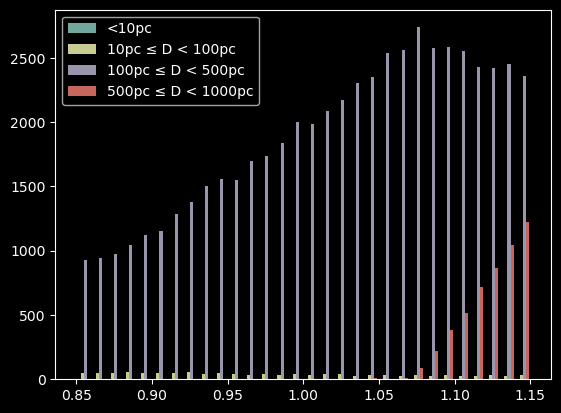

C:\Miniforge-all\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


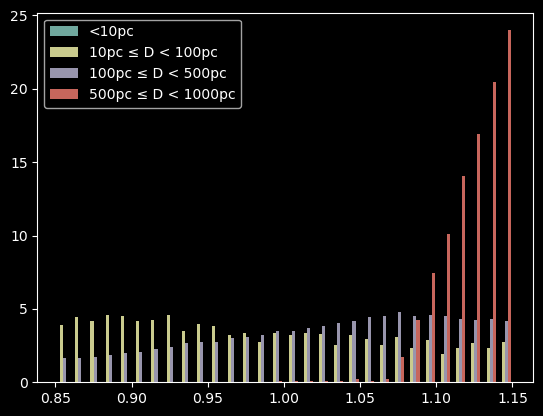

In [7]:


plt.hist(
    [massnewdis, massnewdis2, massnewdis3, massnewdis4],
    bins=30,
    label=['<10pc', '10pc ≤ D < 100pc', '100pc ≤ D < 500pc', '500pc ≤ D < 1000pc'],
    alpha=0.8
)

plt.legend()
plt.savefig('histplot1.jpeg')
plt.show()


plt.hist(
    [massnewdis, massnewdis2, massnewdis3, massnewdis4],
    bins=30,
    density = True,
    label=['<10pc', '10pc ≤ D < 100pc', '100pc ≤ D < 500pc', '500pc ≤ D < 1000pc'],
    alpha=0.8
)

plt.legend()
plt.savefig('densityhist2.jpeg')
plt.show()


In [8]:
newinddis5 =  (pic_tabl2['distance'] < 100) & (pic_tabl2['Mass'] >= 0.95) & (pic_tabl2['Mass'] < 1.05) & (pic_tabl2['Teff'] >= 5540) & (pic_tabl2['Teff'] <= 5839) & (pic_tabl2['Radius'] < 0.9) & (pic_tabl2['Gmag'] < 12)

name1 = pic_tabl2['StarName', 'Mass', 'Radius', 'Teff', 'distance', 'Gmag'][newinddis5]

print(name1)

          StarName                  Mass             Radius            Teff       distance        Gmag      
                                  solMass            solRad             K            pc           mag       
---------------------------- ----------------- ----------------- ---------------- -------- -----------------
Gaia DR3 5265700621534802304 0.980592909579714  0.89750303651092 5827.25124168473  72.1143  9.14642333984375
Gaia DR3 4757024829820200704 0.965229893654007 0.874176873533068 5792.45154739888  89.0271 9.688791275024414
Gaia DR3 5499247886390351104 0.960818832717823 0.874378522896812 5766.00806429968  55.1912 8.669718742370605
Gaia DR3 4789586385623508096 0.951392860078578 0.846906931849498 5776.59476318098  92.0031 9.841035842895508
Gaia DR3 4799563663371481344 0.952335608100839 0.873850900162821 5717.22718515397  69.2592 9.203581809997559
Gaia DR3 5571053142509579648 0.963251605608022 0.873746640094586 5781.83691662433  53.0412  8.57226276397705
Gaia DR3 5561101080

https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html

In [9]:

star_names = [
    'Gaia DR3 5529801905785076992',
    'Gaia DR3 5589140589822710912',
    'Gaia DR3 4822308057854396288',
    'Gaia DR3 5600918043001487616',
    'Gaia DR3 5602096685106118272',
    'Gaia DR3 2922641274023635584',
    'Gaia DR3 5615671255659828480',
    'Gaia DR3 4829023222011088512',
    'Gaia DR3 5508988150664745856',
    'Gaia DR3 5331636478429352832',
    'Gaia DR3 5539701255640836992',
    'Gaia DR3 4802469840105263360',
    'Gaia DR3 5510893810476230144',
    'Gaia DR3 5526441690866412032',
    'Gaia DR3 5292044915839080320',
    'Gaia DR3 5321990183746655872',
    'Gaia DR3 4774543108048368512',
    'Gaia DR3 4874188960657543808',
    'Gaia DR3 2965917433220305024',
    'Gaia DR3 4881345510044485120',
    'Gaia DR3 2902205991429301888',
    'Gaia DR3 5265700621534802304',
    'Gaia DR3 4722135642226902656',
    'Gaia DR3 5481272932860894720',
    'Gaia DR3 5290382630357080320'
]

# Clean the StarName column
clean_starname = np.char.strip(pic_tabl2['StarName'].astype(str))

mask = np.isin(clean_starname, star_names)

final_tbl = pic_tabl2[mask][
    ['StarName', 'Mass', 'Radius', 'Teff', 'Gmag', 'distance']#, 'Gmag', 'NSSFlag']
]
final_tbl.write('prelimtabl1.csv', format='ascii.csv', overwrite=True)
print(len(final_tbl))
print(final_tbl)


starnames2 = [ 
    'Gaia DR3 5291028181119851776',
    'Gaia DR3 5481848424118748672',
    'Gaia DR3 4729274084030162560',
    'Gaia DR3 4763906879239461632',
    'Gaia DR3 4775347916201249792',
    'Gaia DR3 4767108034327506304',
    'Gaia DR3 5485115588561239808',
    'Gaia DR3 5316675801680282880',
    'Gaia DR3 4828528063821835648',
    'Gaia DR3 4784083222550928896',
    'Gaia DR3 5514669980082910208',
    'Gaia DR3 5553647083168192512',
    'Gaia DR3 5554020058128044160',
    'Gaia DR3 5556169912598642560',
    'Gaia DR3 5568492551727378304',
    'Gaia DR3 4808165830030420352',
    'Gaia DR3 5538678297515561088',
    'Gaia DR3 5586381090520538880',
    'Gaia DR3 5546537739765203840',
    'Gaia DR3 2890222139320503040',
    'Gaia DR3 4879098280075566208',
    'Gaia DR3 5608546347283308160',
    'Gaia DR3 2898239468873596800',
    'Gaia DR3 5613359910416875392',
    'Gaia DR3 2914421428175876608'
]

# Clean the StarName column
clean_starname2 = np.char.strip(pic_tabl2['StarName'].astype(str))

mask2 = np.isin(clean_starname2, starnames2)

final_tbl2 = pic_tabl2[mask2][
    ['StarName', 'Mass', 'Radius', 'Teff', 'Gmag', 'distance']#, 'Gmag', 'NSSFlag']
]
final_tbl2.write('prelimtabl2.csv', format='ascii.csv', overwrite=True)
print(len(final_tbl2))
print(final_tbl2)

24
          StarName                  Mass             Radius            Teff              Gmag        distance
                                  solMass            solRad             K                mag            pc   
---------------------------- ----------------- ----------------- ---------------- ------------------ --------
Gaia DR3 5265700621534802304 0.980592909579714  0.89750303651092 5827.25124168473   9.14642333984375  72.1143
Gaia DR3 4722135642226902656  1.00761441441786 0.969757974560121 5820.04499859657  5.092834727366266   12.039
Gaia DR3 5292044915839080320 0.874525932035232 0.819186667291449 5378.85523281657 11.988969802856445  203.144
Gaia DR3 5481272932860894720  1.08375914230151  1.09819117048566  5976.2323875532  7.702243937077247  47.8832
Gaia DR3 5290382630357080320  1.06518064907652  1.14777493814835 5783.88959719062  9.206395149230957  93.2096
Gaia DR3 4774543108048368512  1.07007269960038 0.901853397977097 6329.79779032796 10.211104393005371   140.16
Gaia DR

In [10]:
# plt.figure(figsize=(8,6))
# plt.scatter(pic_tabl2['Mass'], pic_tabl2['Gmag'], color = 'orange', marker = '*', s = 10, label = 'PIC')
# plt.scatter(final_tbl2['Mass'], final_tbl2['Gmag'], color = 'orange', edgecolor = 'darkmagenta', marker = '*', s = 20, label = 'Preliminary Stars')
# plt.scatter(final_tbl['Mass'], final_tbl['Gmag'], color = 'orange', edgecolor = 'darkmagenta', marker = '*', s = 20, label = 'Preliminary Stars')
# plt.axvspan(0.5, 1.5, color='white' , alpha=0.4, label = 'Sun-like Stars')
# plt.xlim(0.4, 1.6)
# plt.title('Preliminary Stars overlayed onto PIC')
# plt.xlabel('Mass')
# plt.ylabel('Magnitude')
# plt.legend()
# plt.savefig('prelimstarsplot1.jpeg')
# plt.show()

In [11]:
param = np.array(pic_tabl2['Mass'])

bin_width = 0.1
bins = np.arange(0.5, 1.5 + bin_width, bin_width)

for low, high in zip(bins[:-1], bins[1:]):
    stars_in_bin = param[(pic_tabl2['Mass'] >= low) & (pic_tabl2['Mass'] < high)]
    print(f"{low:.1f}–{high:.1f}: {len(stars_in_bin)} stars")

0.5–0.6: 6419 stars
0.6–0.7: 4431 stars
0.7–0.8: 5622 stars
0.8–0.9: 9089 stars
0.9–1.0: 16141 stars
1.0–1.1: 24993 stars
1.1–1.2: 36651 stars
1.2–1.3: 41761 stars
1.3–1.4: 35359 stars
1.4–1.5: 20466 stars


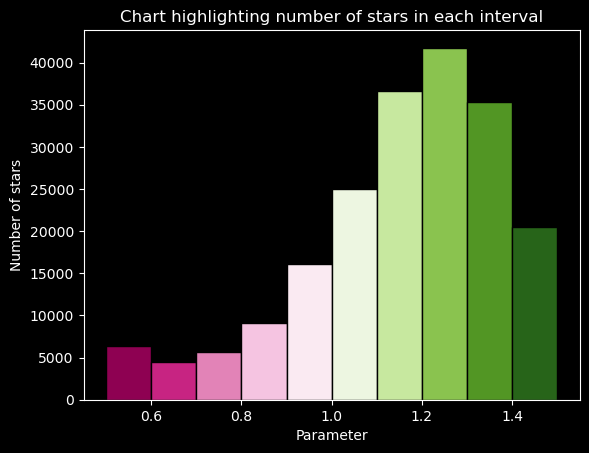

In [12]:
counts, edges = np.histogram(param, bins=bins)

# Colors for each bin
colors = plt.cm.PiYG(np.linspace(0, 1, len(counts)))

# Plot manually using bar
plt.bar(edges[:-1], counts, width=bin_width, color=colors, edgecolor='black', align='edge')
plt.title('Chart highlighting number of stars in each interval')
plt.xlabel('Parameter')
plt.ylabel('Number of stars')
plt.savefig('numofstarsinterval1.jpeg')
plt.show()

0.5–0.6: 0 stars
0.6–0.7: 0 stars
0.7–0.8: 5 stars


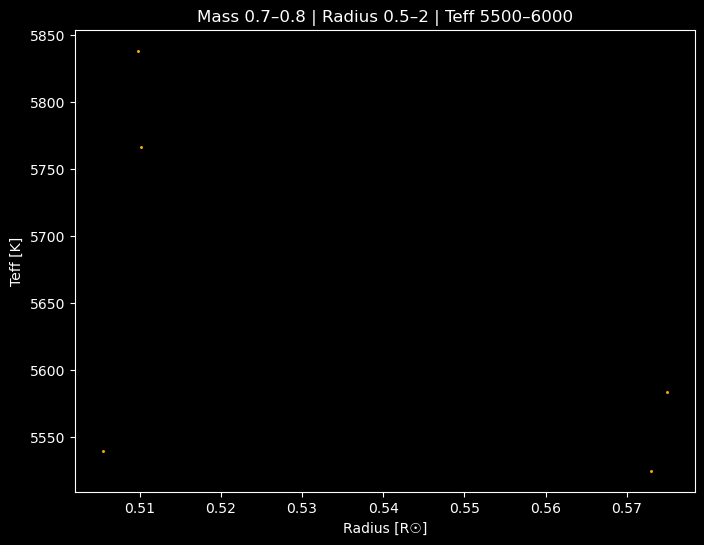

0.8–0.9: 435 stars


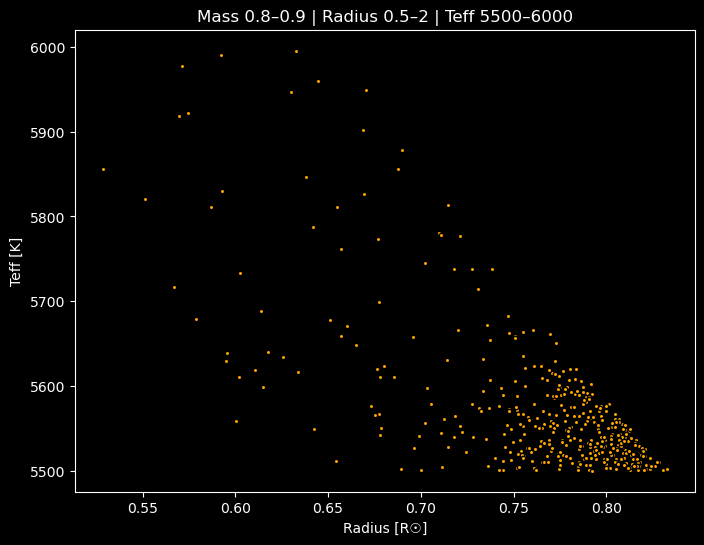

0.9–1.0: 10218 stars


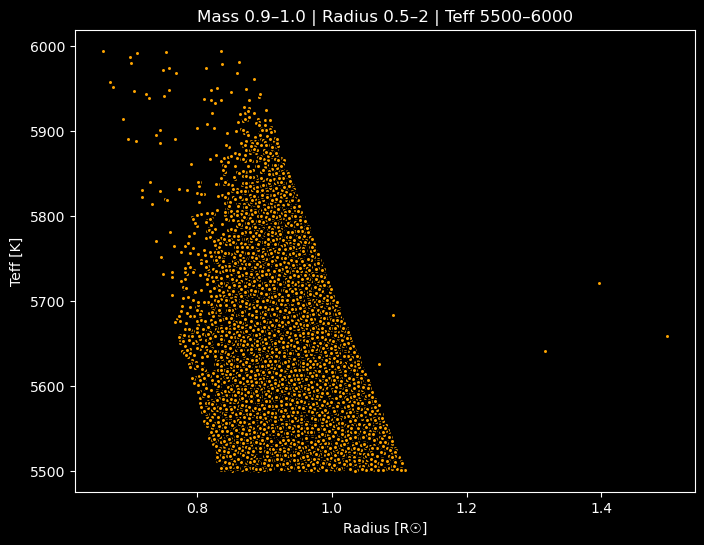

1.0–1.1: 20511 stars


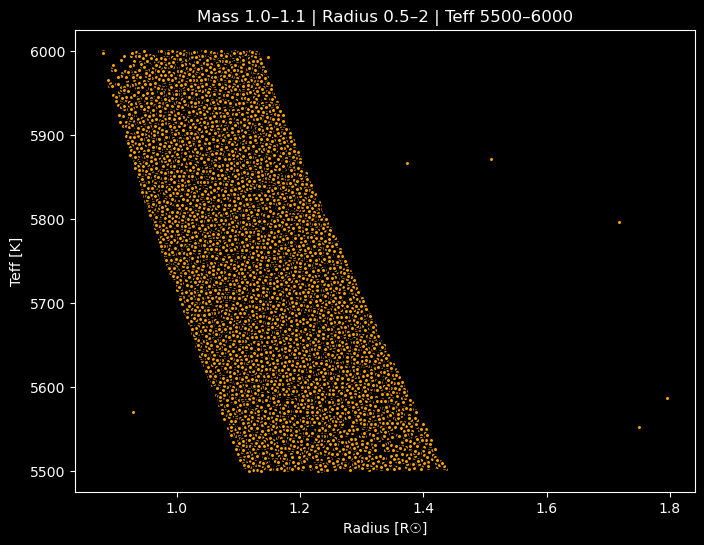

1.1–1.2: 18611 stars


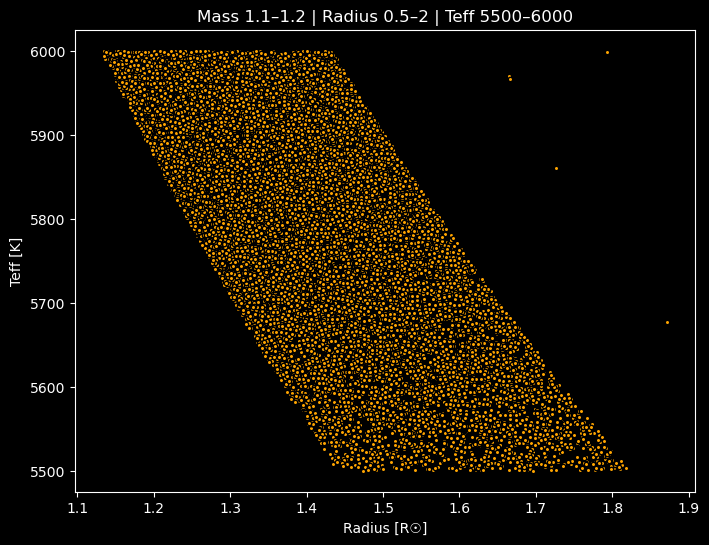

1.2–1.3: 11740 stars


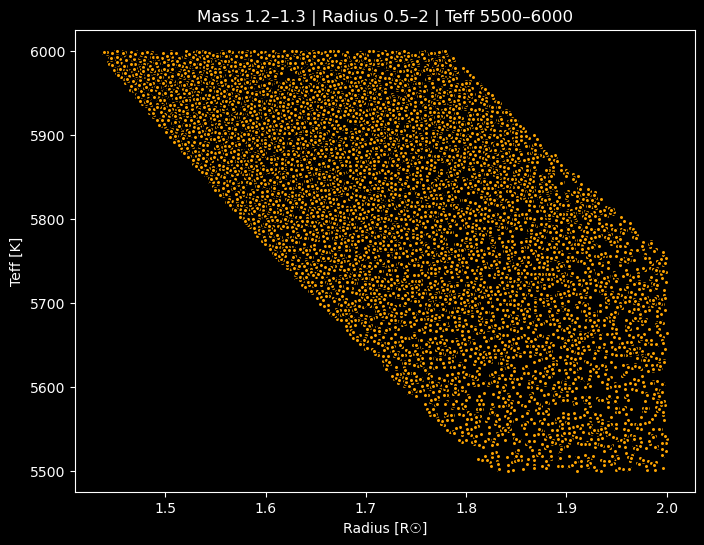

1.3–1.4: 1840 stars


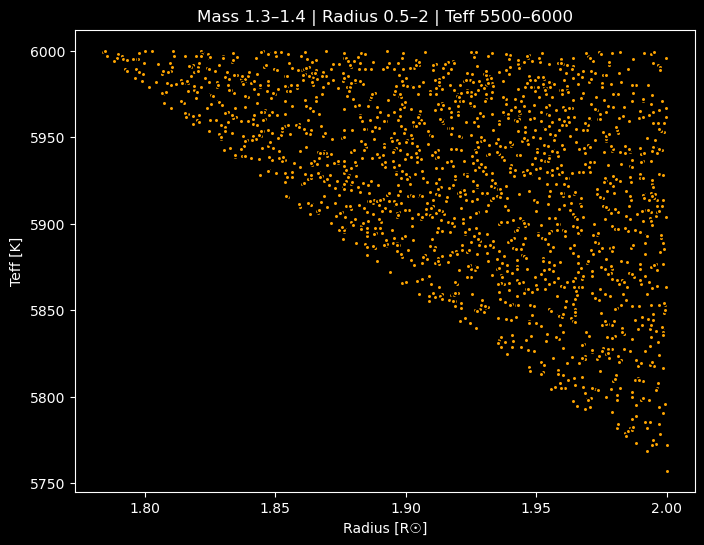

1.4–1.5: 0 stars


In [13]:
param_mass = np.array(pic_tabl2['Mass'])
param_radius = np.array(pic_tabl2['Radius'])
param_teff = np.array(pic_tabl2['Teff'])

bin_width = 0.1
bins_mass = np.arange(0.5, 1.5 + bin_width, bin_width)
radius_range = (0.5, 2)
temp_range = (5500, 6000)

for low, high in zip(bins_mass[:-1], bins_mass[1:]):
    mask = (
        (param_mass >= low) & (param_mass < high) &
        (param_radius >= radius_range[0]) & (param_radius <= radius_range[1]) &
        (param_teff >= temp_range[0]) & (param_teff <= temp_range[1])
    )
    stars_in_bin = pic_tabl2[mask]
    print(f"{low:.1f}–{high:.1f}: {len(stars_in_bin)} stars")
    if len(stars_in_bin) > 0:
        plt.figure(figsize=(8,6))
        plt.scatter(stars_in_bin['Radius'], stars_in_bin['Teff'], c='orange', edgecolor='black', marker = 'o', s = 10)
        plt.xlabel('Radius [R☉]')
        plt.ylabel('Teff [K]')
        plt.title(f"Mass {low:.1f}–{high:.1f} | Radius {radius_range[0]}–{radius_range[1]} | Teff {temp_range[0]}–{temp_range[1]}")
        #plt.gca().invert_yaxis()  # Common in stellar plots: hotter stars on top
        plt.show()

In [14]:
!pip install ipympl
%matplotlib widget

In [15]:
param_mass1 = np.array(pic_tabl2['Mass'])
param_radius1 = np.array(pic_tabl2['Radius'])
param_teff1 = np.array(pic_tabl2['Teff'])

bin_width1 = 0.1
bins_mass1 = np.arange(0.5, 1.5 + bin_width1, bin_width1)  # your Mass bins
radius_range1 = (0.5, 2)
temp_range1 = (5000, 6000)

Mass 0.5–0.6: 0 stars
Mass 0.6–0.7: 0 stars
Mass 0.7–0.8: 791 stars
Mass 0.8–0.9: 8284 stars
Mass 0.9–1.0: 15975 stars
Mass 1.0–1.1: 22507 stars
Mass 1.1–1.2: 20867 stars
Mass 1.2–1.3: 12085 stars
Mass 1.3–1.4: 1840 stars
Mass 1.4–1.5: 0 stars


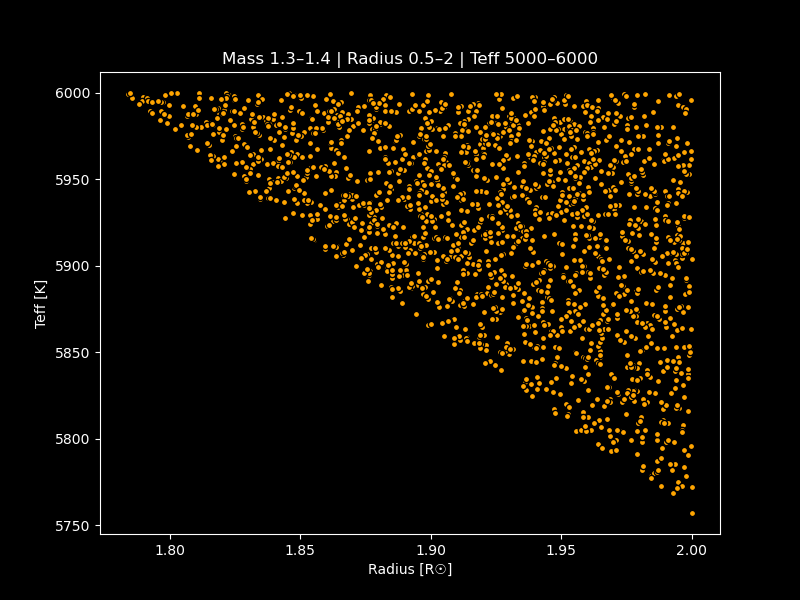

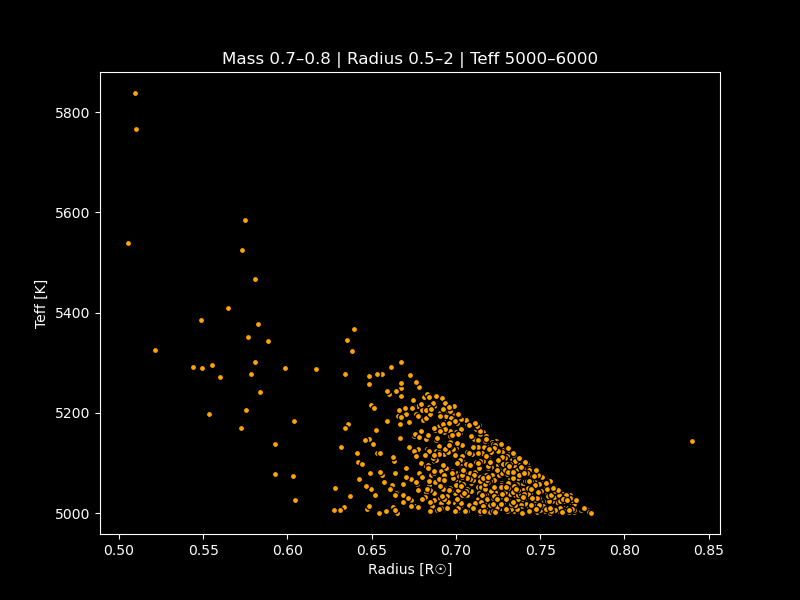

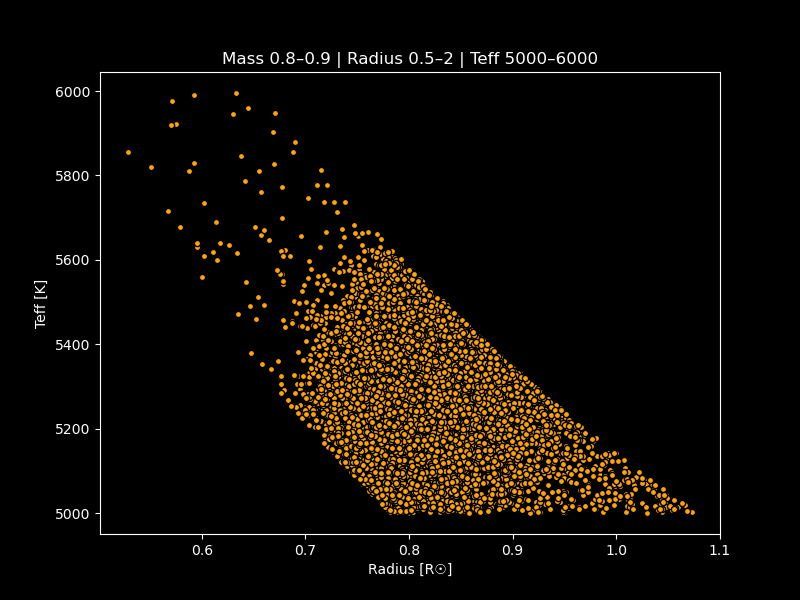

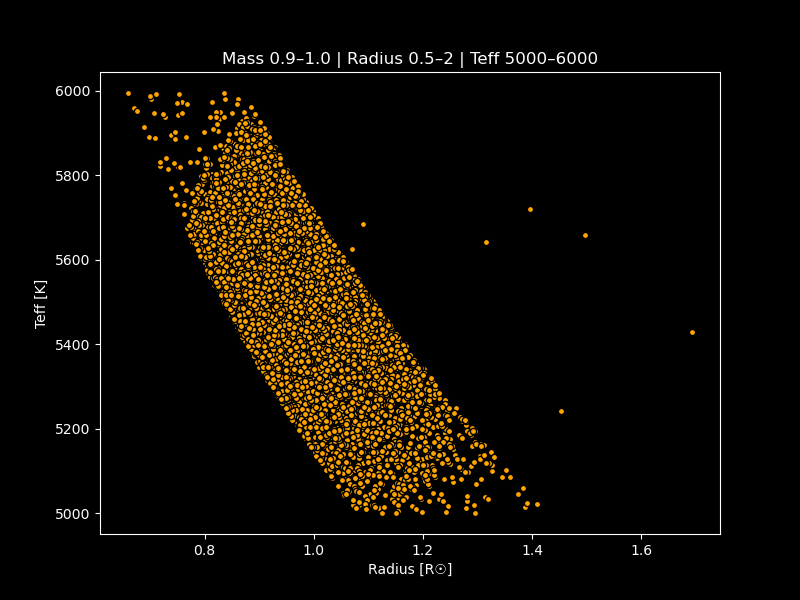

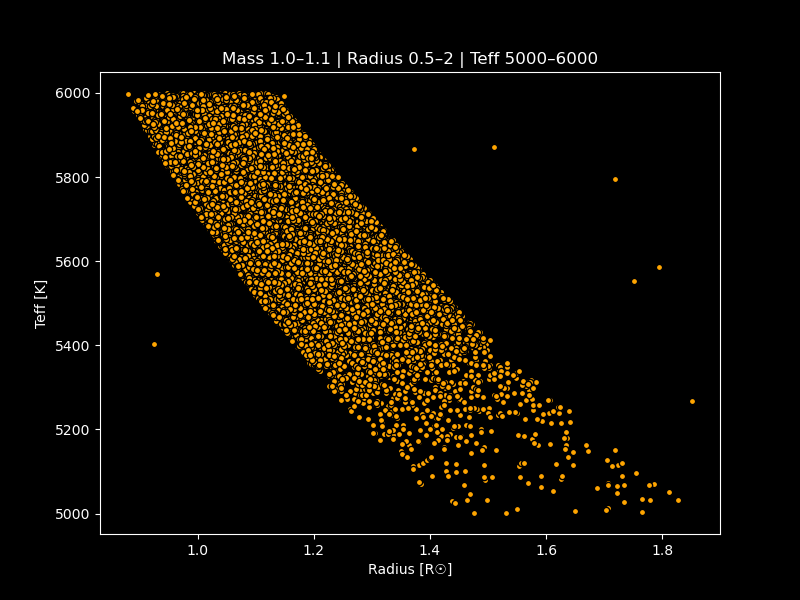

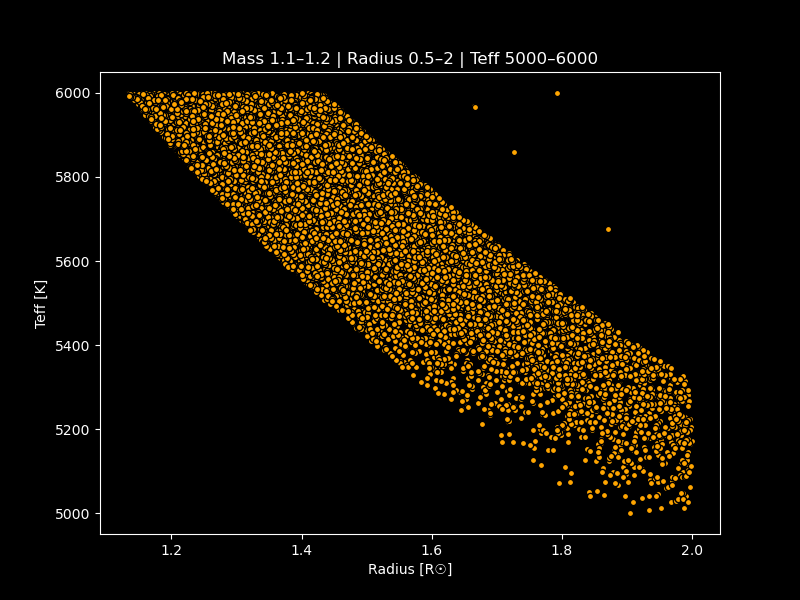

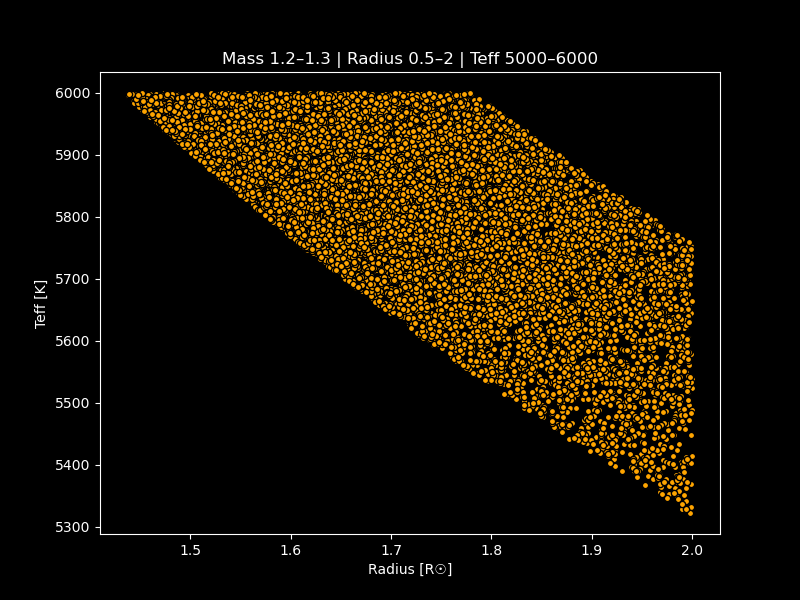

In [16]:
for i in range(len(bins_mass1)-1):
    low = bins_mass1[i]
    high = bins_mass1[i+1]
    
    mask = (
        (param_mass1 >= low) & (param_mass1 < high) &
        (param_radius1 >= radius_range1[0]) & (param_radius1 <= radius_range1[1]) &
        (param_teff1 >= temp_range1[0]) & (param_teff1 <= temp_range1[1])
    )
    
    stars_in_bin = pic_tabl2[mask]
    print(f"Mass {low:.1f}–{high:.1f}: {len(stars_in_bin)} stars")
    
    if len(stars_in_bin) > 0:
        fig, ax = plt.subplots(figsize=(8,6))
        sc = ax.scatter(
            stars_in_bin['Radius'], stars_in_bin['Teff'], 
            c='orange', edgecolor='black', marker='o', s=20, picker=True
        )
        #ax.scatter(stars_in_bin['Radius'][2] == 0.51, stars_in_bin['Teff'][2] == 5840)
        ax.set_xlabel('Radius [R☉]')
        ax.set_ylabel('Teff [K]')
        ax.set_title(f"Mass {low:.1f}–{high:.1f} | Radius {radius_range1[0]}–{radius_range1[1]} | Teff {temp_range1[0]}–{temp_range1[1]}")
        # Function to track mouse movement
        def on_move(event):
            if event.inaxes:
            # show coordinates in the console
                print(f'Mouse at: data coords ({event.xdata:.2f}, {event.ydata:.2f})')

        # Function to handle clicks
        def on_click(event):
            if event.inaxes and event.button == 1:
                distances = np.sqrt((Radius - event.xdata)**2 + (Teff - event.ydata)**2)
                idx = np.argmin(distances)
                x, y = Radius[idx], Teff[idx]
                selected_points.append((x, y))
                print(f'Selected star at ({x:.2f}, {y:.2f})')
                ax.scatter(x, y, 'ro', markersize=8, zorder=10)
                fig.canvas.draw_idle()
                print(selected_points)

        # Connect events
        move_id = fig.canvas.mpl_connect('motion_notify_event', on_move)
        click_id = fig.canvas.mpl_connect('button_press_event', on_click)

plt.savefig('Binned mass plots of all the stars.jpeg')            
plt.show()    

In [17]:
constraints = (pic_tabl2['Mass'] >= 1.4) & (pic_tabl2['Mass'] < 1.5) & (pic_tabl2['Gmag'] < 10) & (pic_tabl2['Teff'] > 5800) & (pic_tabl2['Radius'] > 1.5)
print(pic_tabl2['PICname', 'Gmag', 'Mass', 'Radius', 'Teff'][constraints])#

     PICname             Gmag             Mass            Radius            Teff      
                         mag            solMass           solRad             K        
----------------- ----------------- ---------------- ---------------- ----------------
PIC 3094366000252 8.173900604248047 1.40692565001694 1.92404247556974 6301.35793654005
PIC 3093088000157 8.000870704650879 1.48913342658408 2.40108637199977 6154.35299561892
PIC 3089803000128 8.714373588562012 1.42418896509412 1.77652549980513 6555.04338230206
PIC 3088460000055 9.983423233032227   1.470317835198 2.25452263434473 6216.37489500455
PIC 3088464000109 9.113876342773438 1.40706943279851 1.90939023453201 6318.92204941104
PIC 3085733000107  8.68147087097168  1.4011296564975 1.67563602682486 6587.05444033166
PIC 3085721000143 9.618276596069336 1.47778026544488 2.36003153428188 6146.54883492924
PIC 3082892000573 9.530786514282227 1.49013546040954  2.6111068484474 5977.52507221193
PIC 3082862000731 8.507418632507324 1.46811

In [58]:
new_star_names = [
    'PIC 2510264000042',
    'PIC 2977189000256', 
    'PIC 3020552000163', 
    'PIC 2964273000151', 
    'PIC 2868564000092', 
    'PIC 2842621000035', 
    'PIC 2839750001030', 
    'PIC 2736539000009', 
    'PIC 2859592000110', 
    'PIC 2859555000071', 
    'PIC 2729338000052', 
    'PIC 2877599000314', 
    'PIC 3043284000102',
    'PIC 2547225000044', 
    'PIC 3012410000021', 
    'PIC 2986390000903', 
    'PIC 2985284000128', 
    'PIC 2718541000560', 
    'PIC 2943189000097', 
    'PIC 3046930002826',
    'PIC 2865551000067',
    'PIC 3074112000113',
    'PIC 2966670000135',
    'PIC 2577865000019',
    'PIC 2453057000185',
    'PIC 2897515000003',
    'PIC 2539047000122',
    'PIC 2996526000539',
    'PIC 2336244000008',
    'PIC 2838076000148',
    'PIC 2229859000914',
    'PIC 2883424000508',
    'PIC 2375263000071',
    'PIC 2608557000070',
    'PIC 2815804000123',
    'PIC 2590071000003',
    'PIC 2555426000054',
    'PIC 2738521000001',
    'PIC 2494128000017', 
    'PIC 2978427000030',
    'PIC 2512578000004',
    'PIC 2940708000256',
    'PIC 2879084000531',
    'PIC 2758209000423', 
    'PIC 2289056000055', 
    'PIC 2412169000438', 
    'PIC 2765228000001', 
    'PIC 2926391000094',
    'PIC 2949644000621', 
    'PIC 2926379000203'
]

    
    
# Clean the PICname column
clean_picname2 = np.char.strip(pic_tabl2['PICname'].astype(str))

mask3 = np.isin(clean_picname2, new_star_names)

final_tblpic = pic_tabl2[mask3][
    ['PICname', 'Mass', 'Radius', 'Teff', 'Gmag', 'distance','BPmag', 'RPmag', 'VmagCalculated','tPICplanetFlag', 'BOLrandomSysNSRNCAM_T']
]
final_tblpic.write('finaltable.csv', format='ascii.csv', overwrite=True)
print(len(final_tblpic))
print(final_tblpic)

50
     PICname             Mass             Radius      ... VmagCalculated tPICplanetFlag BOLrandomSysNSRNCAM_T
                       solMass            solRad      ...      mag                           ppm/sqrt(h)     
----------------- ----------------- ----------------- ... -------------- -------------- ---------------------
PIC 3074112000113  1.16802973918309  1.33732703426504 ...      11.272253              0                 92.17
PIC 3046930002826  1.46008331515057  2.11224344849025 ...      12.888203              0                 230.9
PIC 3043284000102  1.05706561037644  1.20886234926196 ...      11.227598            257                 85.98
PIC 3020552000163 0.554053061850283 0.529551726600744 ...      13.948139              0                 187.0
PIC 3012410000021  1.09253001907876  1.36390775207011 ...       10.31709              0                 38.61
PIC 2996526000539  1.30280914190342  1.38144006175875 ...       8.153065              0                 23.06
PIC 298

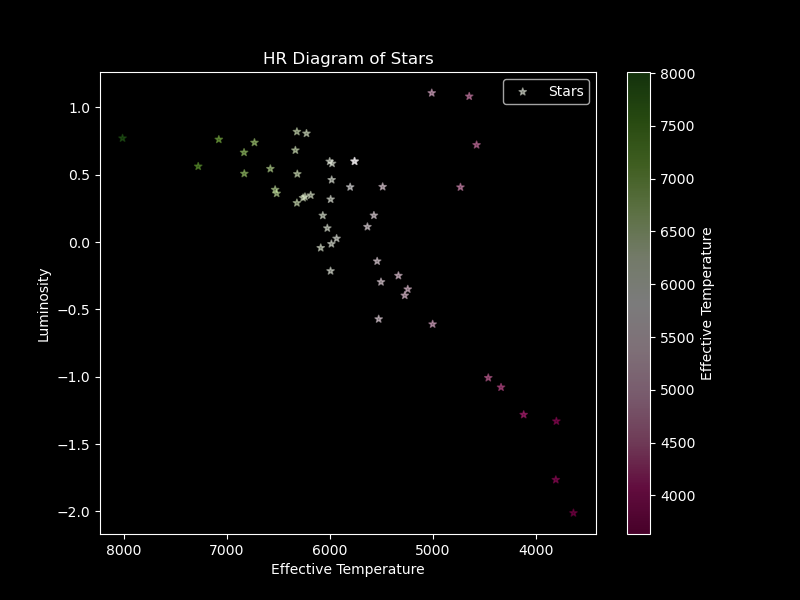

In [32]:
#HR diagram

abs_mag = final_tblpic['VmagCalculated'] + 5 - (5*(np.log10(final_tblpic['distance'])))
sun_abs = 4.83
luminosity = 10**(0.4*(sun_abs - abs_mag))

plt.figure(figsize=(8,6))
plt.scatter(final_tblpic['Teff'], np.log10(luminosity), c = final_tblpic['Teff'], cmap = 'PiYG', s = 30, marker = '*', alpha = 0.5, label = 'Stars')
plt.colorbar(label = 'Effective Temperature')
plt.title('HR Diagram of Stars')
plt.xlabel('Effective Temperature')
plt.ylabel('Luminosity')
plt.gca().invert_xaxis()
plt.legend()
#plt.savefig('hr of chosen stars.jpeg')
plt.show()


C:\Users\exs177\AppData\Local\Temp\ipykernel_16888\25397552.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,6))


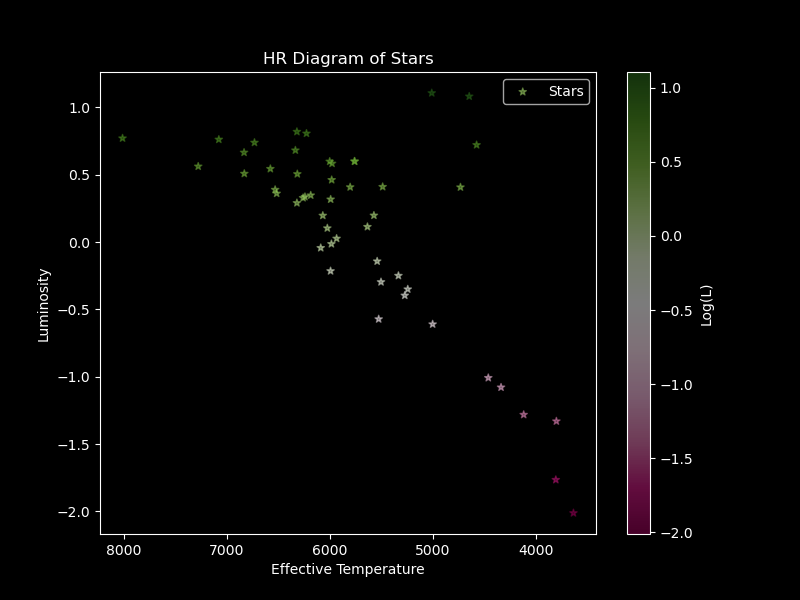

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(final_tblpic['Teff'], np.log10(luminosity), c = np.log10(luminosity), cmap = 'PiYG', s = 30, marker = '*', alpha = 0.5, label = 'Stars')
plt.colorbar(label = 'Log(L)')
plt.title('HR Diagram of Stars')
plt.xlabel('Effective Temperature')
plt.ylabel('Luminosity')
plt.gca().invert_xaxis()
plt.legend()
#plt.savefig('hr of chosen stars.jpeg')
plt.show()

      BPmag       
       mag        
------------------
0.7560920715332031
0.6611719131469727
0.8583621978759766
 1.968958854675293
0.8763179779052734
0.5722332000732422
 0.678105354309082
0.6442165374755859
0.6017313003540039
2.1856279373168945
0.6866016387939453
 1.657332420349121
               ...
0.7385635375976562
1.9739141464233398
0.7044486999511719
1.1070547103881836
0.5108213424682617
1.3777236938476562
 1.691056251525879
 1.293543815612793
0.4876279830932617
0.6280803680419922
0.6908273696899414
0.4437704086303711
0.6392383575439453
Length = 50 rows


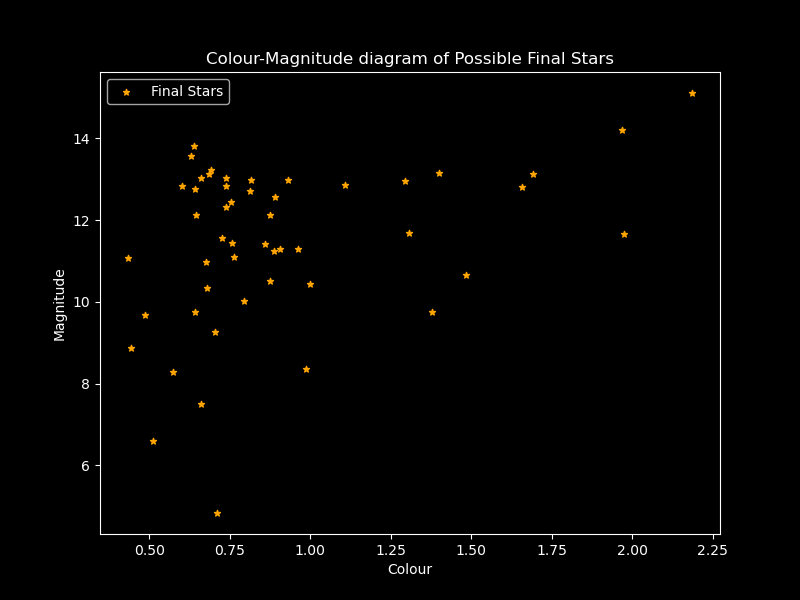

In [34]:
colour = final_tblpic['BPmag'] - final_tblpic['RPmag']
print(colour)
#colourconstraint = (pic_tabl2['Gmag'] <13) & (pic_tabl2['Mass'] <= 0.6)
#print(pic_tabl2['PICname'][colourconstraint])
plt.figure(figsize=(8,6))
plt.scatter(colour, final_tblpic['BPmag'], color = 'orange', marker = '*', s = 20, label = 'Final Stars')
plt.xlabel('Colour')
plt.ylabel('Magnitude')
plt.title('Colour-Magnitude diagram of Possible Final Stars')
plt.legend()
plt.savefig('cmd of final stars.jpeg')
plt.show()

C:\Users\exs177\AppData\Local\Temp\ipykernel_16888\2170993372.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('finalstars2.jpeg')
C:\Miniforge-all\Lib\site-packages\ipympl\backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


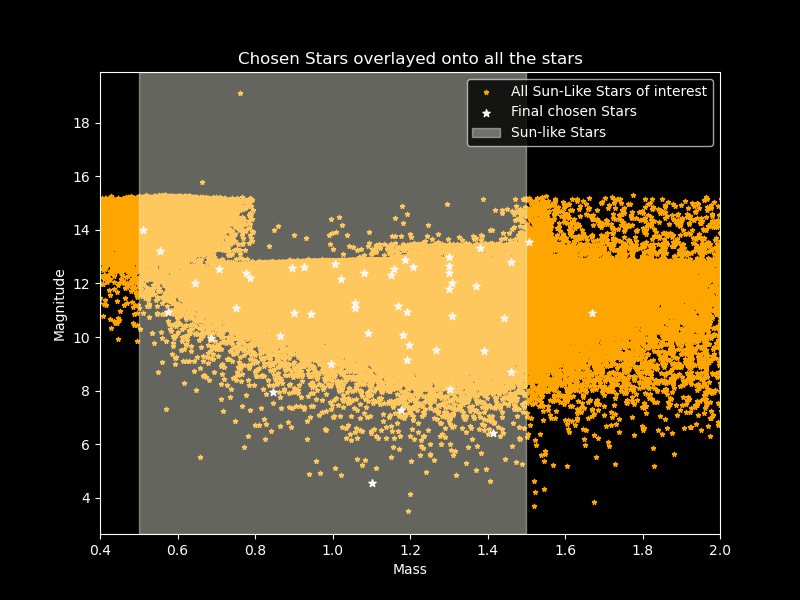

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(pic_tabl2['Mass'], pic_tabl2['Gmag'], color = 'orange', s = 10, marker = '*', label = 'All Sun-Like Stars of interest')
plt.scatter(final_tblpic['Mass'], final_tblpic['Gmag'], color = 'lavenderblush', s = 30, marker = '*', label = 'Final chosen Stars')
plt.axvspan(0.5, 1.5, color='ivory' , alpha=0.4, label = 'Sun-like Stars')
plt.xlim(0.4, 2)
plt.title('Chosen Stars overlayed onto all the stars')
plt.xlabel('Mass')
plt.ylabel('Magnitude')
plt.legend()
plt.savefig('finalstars2.jpeg')
plt.show()

ADJUSTING FINAL LIST AS WE GOT FEEDBACK TODAY 12/02/2026

1402


C:\Miniforge-all\Lib\site-packages\ipympl\backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


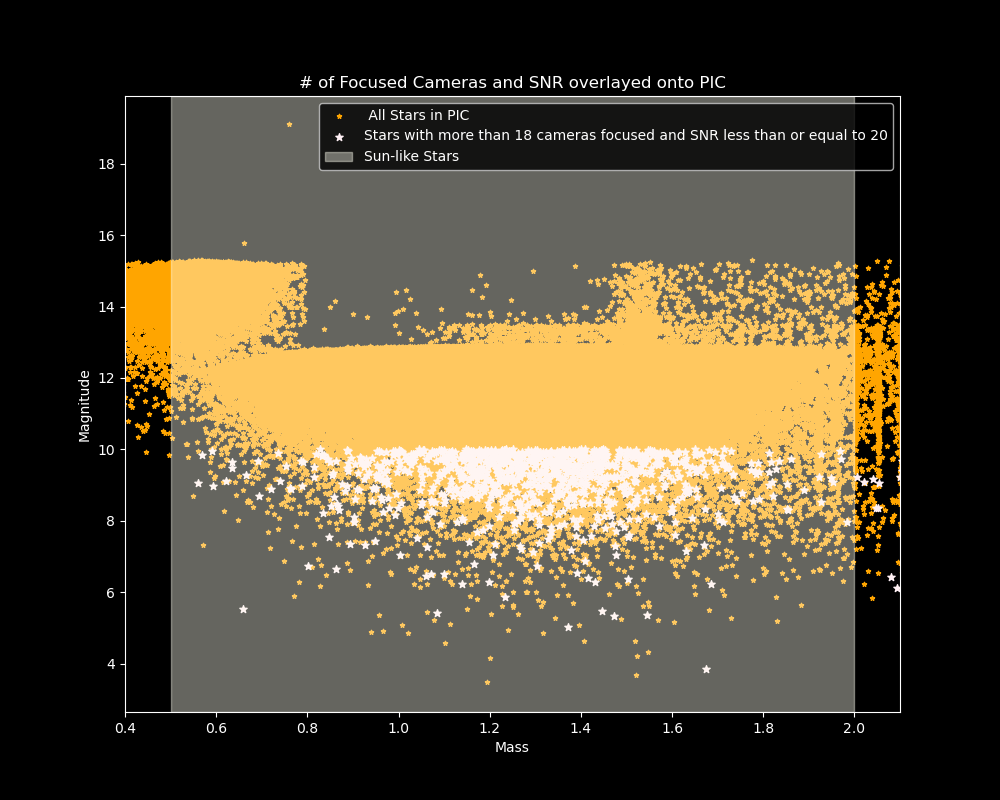

In [59]:
#Focusiung on brighter stars and number of cameras on them, want at least 18 cameras focusing on the dimmer stars so the SNR is reduced.

meanmg = np.mean(pic_tabl2['Gmag'])
variance = ((pic_tabl2['Gmag'] - meanmg)**2) / 309787 
noise = 2 * ((pic_tabl2['BOLrandomSysNSRNCAM_T'])**2) * 3600 * ( 10 **(-6))

maskforpic = (pic_tabl2['BOLnCameraObsNCAM_T'] > 18) & ( noise <= 20) & (pic_tabl2['Gmag'] <= 10)

newfinalpic = pic_tabl2[maskforpic]
print(len(newfinalpic))

plt.figure(figsize=(10,8))
plt.scatter(pic_tabl2['Mass'], pic_tabl2['Gmag'], color = 'orange', marker = '*', s = 10, label = ' All Stars in PIC')
plt.scatter(newfinalpic['Mass'], newfinalpic['Gmag'], color = 'lavenderblush', marker = '*', s = 30, label = 'Stars with more than 18 cameras focused and SNR less than or equal to 20')
plt.axvspan(0.5, 2, color='ivory' , alpha=0.4, label = 'Sun-like Stars')
plt.xlim(0.4, 2.1)
plt.title('# of Focused Cameras and SNR overlayed onto PIC')
plt.xlabel('Mass')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

     PICname            Mass              Gmag            Radius            Teff       tPICplanetFlag
                      solMass             mag             solRad             K                       
----------------- ---------------- ----------------- ---------------- ---------------- --------------
PIC 2916929000120 1.40495676913775 9.897418022155762 1.89446775858383 6327.26140035157              0
PIC 2915577000081 1.18468961577826 9.241145133972168 1.40859303472183 5962.24748534666              0
PIC 2915571000104 1.28076314788399 9.024362564086914 1.99420726648303   5678.822619091              0
PIC 2912861000050 1.24677161647431 9.961657524108887 1.71093769782036 5845.03934126324              0
PIC 2912856000054 1.52760230767365  9.42889404296875  3.0402587381458 5799.01436351621              0
PIC 2911475000035 1.22162963867387 8.829789161682129 1.49459601034261 6014.17746461255              0
PIC 2911495000112 1.26682670213759 8.095929145812988 1.54715526989198 6153.1334515

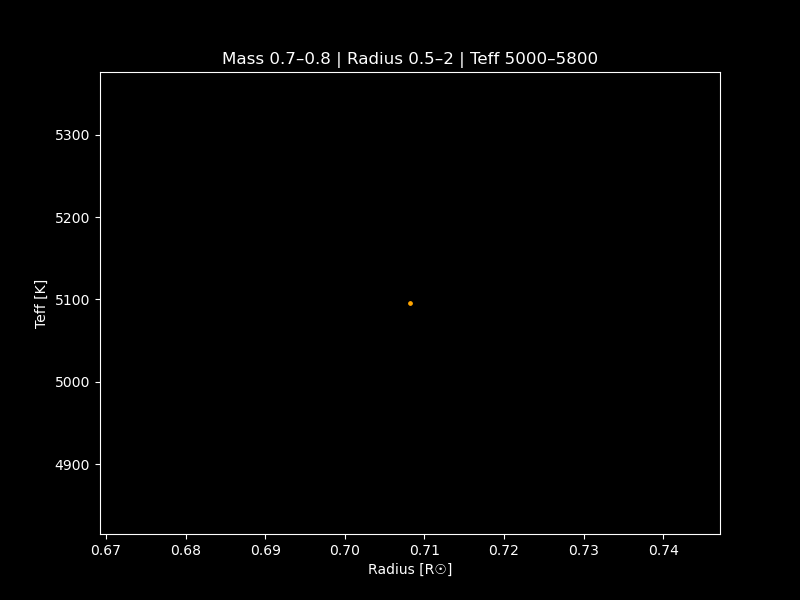

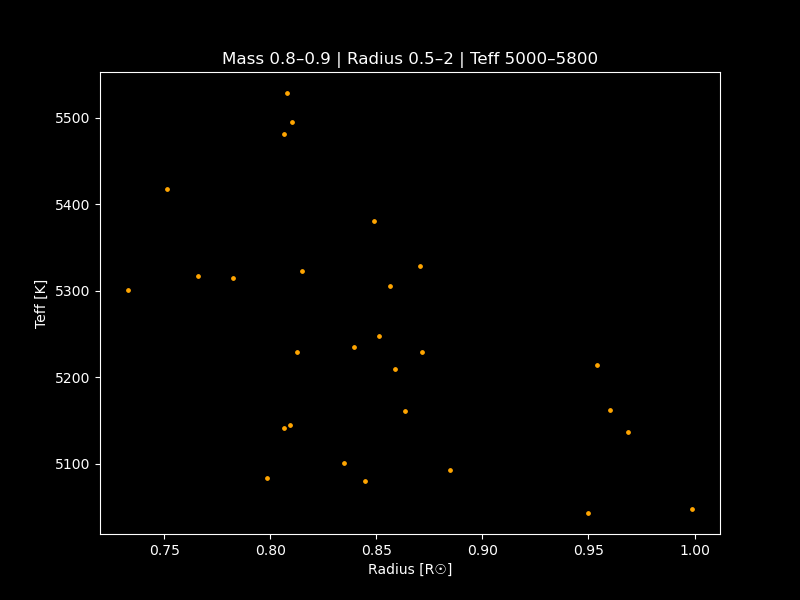

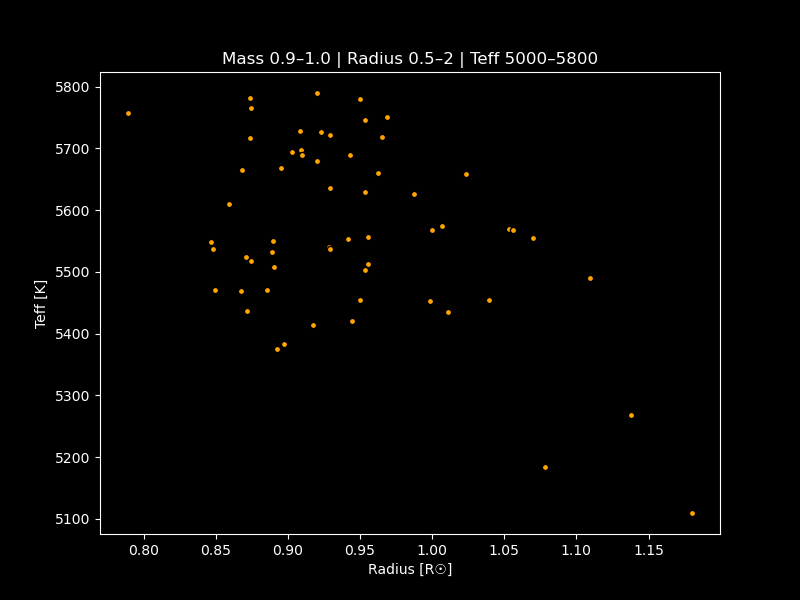

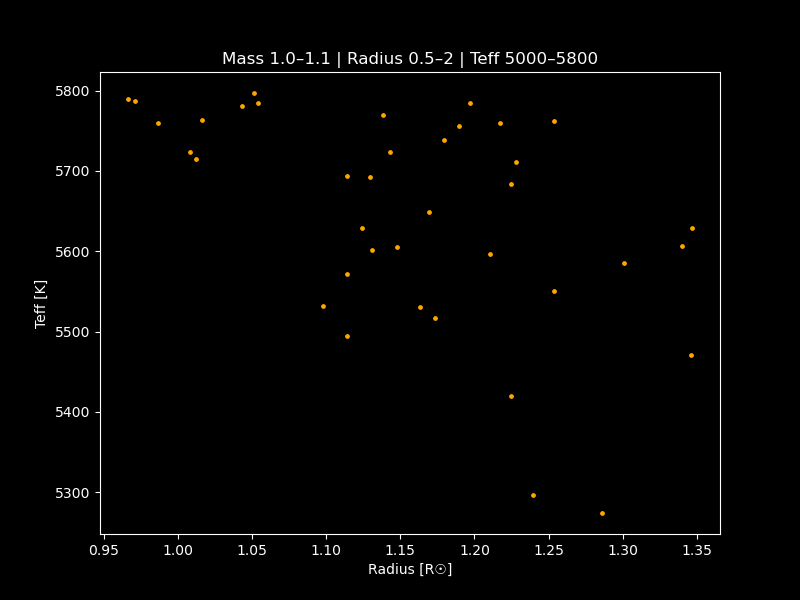

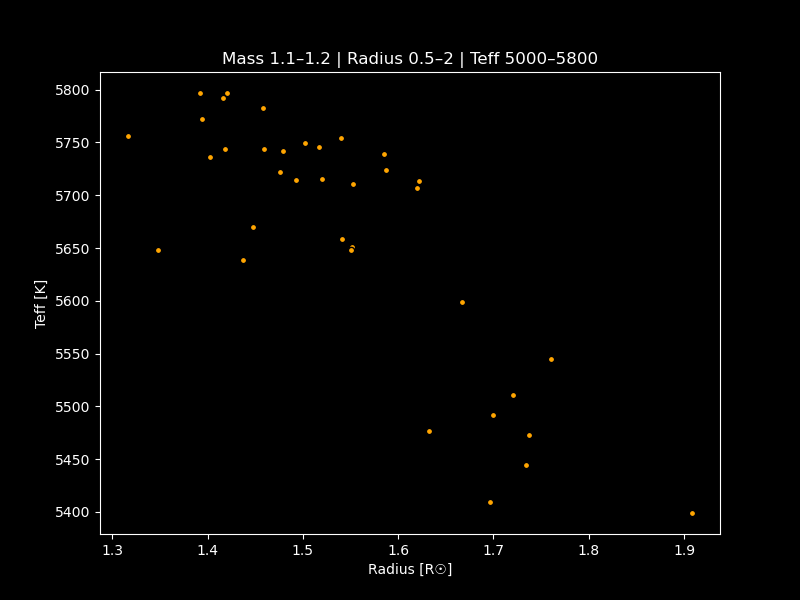

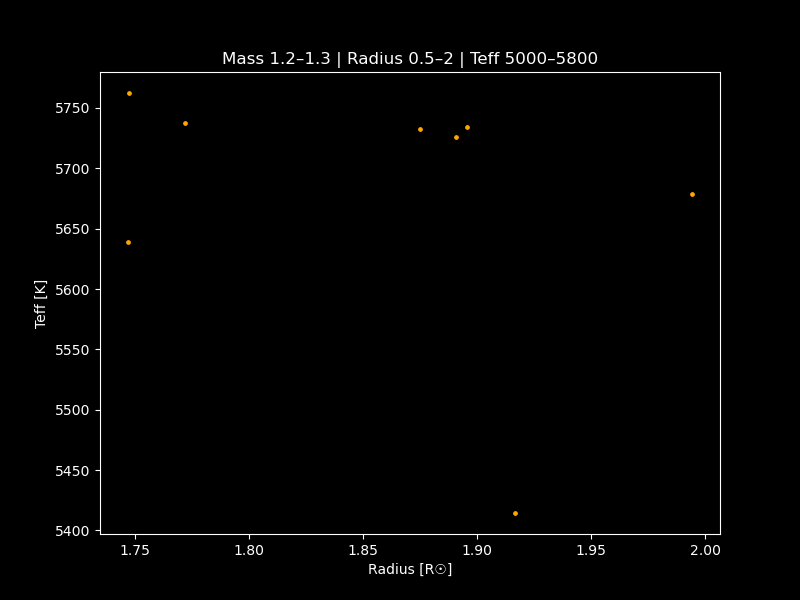

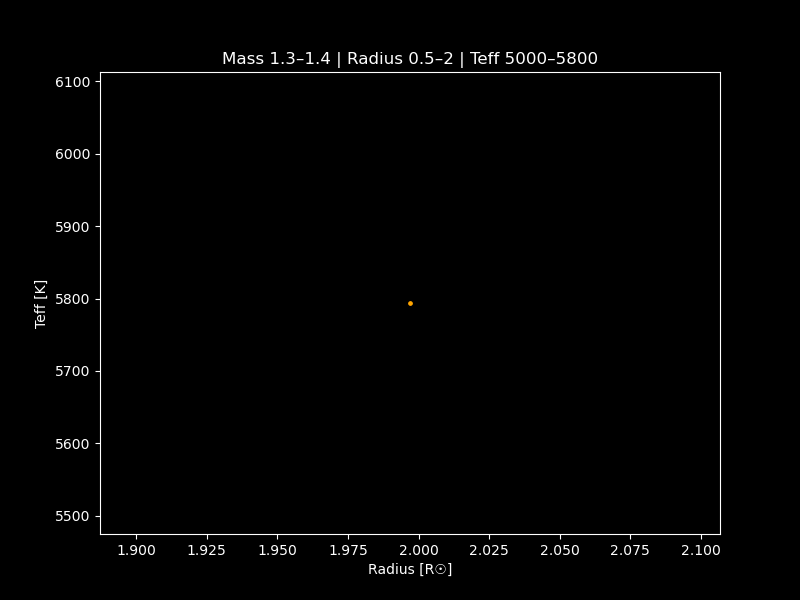

In [61]:
maskforpic = (~np.isnan(newfinalpic['Mass']) &
              ~np.isnan(newfinalpic['Gmag']) &
              ~np.isnan(newfinalpic['Radius']) &
              ~np.isnan(newfinalpic['Teff']))

newfinalpic = newfinalpic[maskforpic]
newmask = (newfinalpic['Gmag'] <= 10) & (newfinalpic['Mass'] < 2) & (newfinalpic['Mass'] >= 0.5) 
newfinalpic = newfinalpic[newmask]

print(newfinalpic['PICname', 'Mass', 'Gmag', 'Radius', 'Teff', 'tPICplanetFlag'])


#----- Binned Data for refined final list ----- #

param_mass1 = np.array(newfinalpic['Mass'])
param_radius1 = np.array(newfinalpic['Radius'])
param_teff1 = np.array(newfinalpic['Teff'])

bin_width1 = 0.1
bins_mass1 = np.arange(0.5, 1.5 + bin_width1, bin_width1)  # your Mass bins
radius_range1 = (0.5, 2)
temp_range1 = (5000, 5800)

for i in range(len(bins_mass1)-1):
    low = bins_mass1[i]
    high = bins_mass1[i+1]
    
    mask = (
        (param_mass1 >= low) & (param_mass1 < high) &
        (param_radius1 >= radius_range1[0]) & (param_radius1 <= radius_range1[1]) &
        (param_teff1 >= temp_range1[0]) & (param_teff1 <= temp_range1[1])
    )
    
    stars_in_bin = newfinalpic[mask]
    pic_names = stars_in_bin['PICname'].tolist()
    
    print(f"Mass {low:.1f}–{high:.1f}: {len(stars_in_bin)} stars | PICnames: {pic_names}")
    
    
    if len(stars_in_bin) > 0:
        fig, ax = plt.subplots(figsize=(8,6))
        sc = ax.scatter(
            stars_in_bin['Radius'], stars_in_bin['Teff'], 
            c='orange', edgecolor='black', marker='o', s=20, picker=True
        )
        #ax.scatter(stars_in_bin['Radius'][2] == 0.51, stars_in_bin['Teff'][2] == 5840)
        ax.set_xlabel('Radius [R☉]')
        ax.set_ylabel('Teff [K]')
        ax.set_title(f"Mass {low:.1f}–{high:.1f} | Radius {radius_range1[0]}–{radius_range1[1]} | Teff {temp_range1[0]}–{temp_range1[1]}")

In [38]:
print(((1/266)/(69/266))*10)
print(((43/266)/(69/266))*10)
print(((66/266)/(69/266))*10)
print(((69/266)/(69/266))*10)
print(((30/266)/(69/266))*10)
print(((4/266)/(69/266))*10)

0.14492753623188404
6.231884057971014
9.565217391304348
10.0
4.3478260869565215
0.5797101449275361


In [39]:
# 0.0037593984962406013
# 0.16165413533834586
# 0.24812030075187969
# 0.2593984962406015
# 0.11278195488721804
# 0.015037593984962405

In [40]:
#----- New List of Stars -----
stars = ['PIC 2915577000081', 
         'PIC 2897612000102', 
         'PIC 2889072000139', 
         'PIC 2880424000123', 
         'PIC 2877464000062', 
         'PIC 2870094000052', 
         'PIC 2868606000109', 
         'PIC 2862637000040', 
         'PIC 2847353000081', 
         'PIC 2841143000066',
         'PIC 2908735000056', 
         'PIC 2893330000017', 
         'PIC 2890529000062', 
         'PIC 2886168000063', 
         'PIC 2886218000135', 
         'PIC 2883305000009', 
         'PIC 2880424000128', 
         'PIC 2878966000167', 
         'PIC 2868638000148', 
         'PIC 2856556000125',
         'PIC 2908735000057', 
         'PIC 2901793000033', 
         'PIC 2878914000067', 
         'PIC 2874507000079', 
         'PIC 2864154000102', 
         'PIC 2861112000105',
         'PIC 2915571000104', 
         'PIC 2912861000050', 
         'PIC 2886166000078', 
         'PIC 2886191000129',
         'PIC 2844331000233', 
         'PIC 2833293000069',
         'PIC 2705309000027'
]
         
         

# Clean the PICname column
clean_picname4 = np.char.strip(newfinalpic['PICname'].astype(str))

mask7 = np.isin(clean_picname4, stars)

newfinalpic = newfinalpic[mask7][
    ['PICname', 'Mass', 'Radius', 'Teff', 'Gmag', 'distance','BPmag', 'RPmag', 'VmagCalculated', 'tPICplanetFlag']

newfinalpic.write('newfinaltable.csv', format='ascii.csv', overwrite=True)
print(len(newfinalpic))
print(newfinalpic)
         

33
     PICname             Mass             Radius      ...       RPmag        VmagCalculated tPICplanetFlag
                       solMass            solRad      ...        mag              mag                     
----------------- ----------------- ----------------- ... ------------------ -------------- --------------
PIC 2915577000081  1.18468961577826  1.40859303472183 ...  8.787147521972656       9.365117              0
PIC 2915571000104  1.28076314788399  1.99420726648303 ...  8.471739768981934        9.17823              0
PIC 2912861000050  1.24677161647431  1.71093769782036 ...  9.489653587341309      10.097664              0
PIC 2908735000056  1.05045797019762  1.21046157376477 ...  8.309850692749023       9.234578              0
PIC 2908735000057 0.996193169946288  1.06969444260281 ...  8.298332214355469       9.533388              0
PIC 2901793000033 0.994942392145592  0.96878235172639 ...   8.25832462310791       8.893444             16
PIC 2897612000102  1.1462408064559

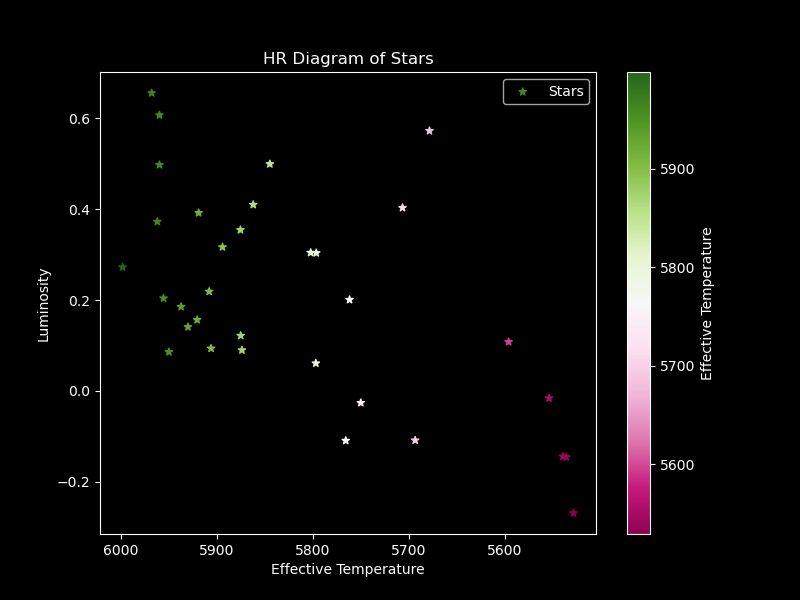

In [51]:
abs_mag1 = newfinalpic['VmagCalculated'] + 5 - (5*(np.log10(newfinalpic['distance'])))
abs_mag2 = newfinalpic1['VmagCalculated'] + 5 - (5*(np.log10(newfinalpic1['distance'])))
sun_abs1 = 4.83
luminosity = 10**(0.4*(sun_abs1 - abs_mag1))
luminosity1 = 10**(0.4*(sun_abs1 - abs_mag2))
mask8 = (newfinalpic['tPICplanetFlag'] > 0)
newfinalpic1 = newfinalpic[mask8]

plt.figure(figsize=(8,6))
plt.scatter(newfinalpic['Teff'], np.log10(luminosity), c = newfinalpic['Teff'], cmap = 'PiYG', s = 30, marker = '*', label = 'Stars')
#plt.scatter(newfinalpic1['Teff'], np.log10(luminosity1), color = 'white', s = 30, marker = '*', alpha = 0.5, label = 'Stars with possible exoplanets')
plt.colorbar(label = 'Effective Temperature')
plt.title('HR Diagram of Stars')
plt.xlabel('Effective Temperature')
plt.ylabel('Luminosity')
plt.gca().invert_xaxis()
plt.legend()
plt.savefig('hr of new chosen stars.jpeg')
plt.show()


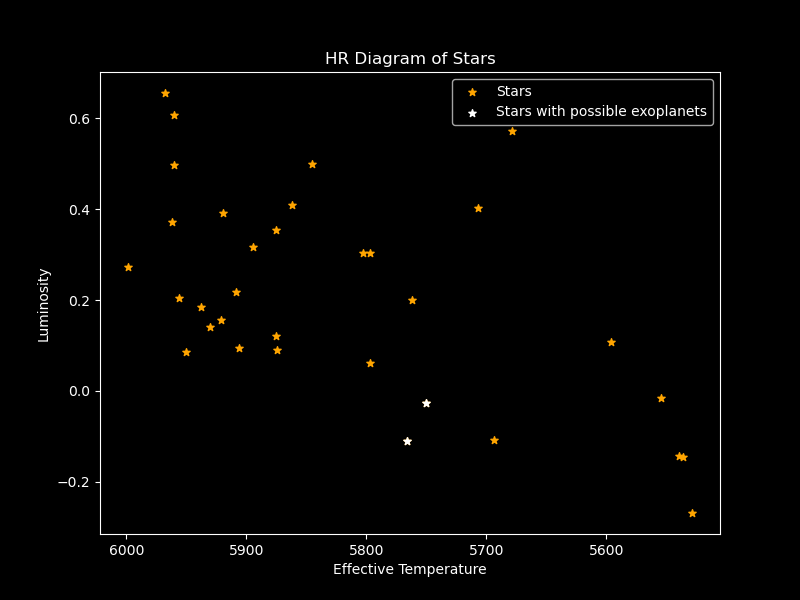

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(newfinalpic['Teff'], np.log10(luminosity), color = 'orange', s = 30, marker = '*', label = 'Stars')
plt.scatter(newfinalpic1['Teff'], np.log10(luminosity1), color = 'white', s = 30, marker = '*', label = 'Stars with possible exoplanets')
#plt.colorbar(label = 'Effective Temperature')
plt.title('HR Diagram of Stars')
plt.xlabel('Effective Temperature')
plt.ylabel('Luminosity')
plt.gca().invert_xaxis()
plt.legend()
#plt.savefig('hr of chosen stars.jpeg')
plt.show()